In [2]:
import pandas as pd
import time
import datetime
import numpy as np


import prob_tree
import kTree
import csv
from fractions import Fraction
import graphviz
import tree
from kTree import ktree_main

import sys
import generators
import numpy as np
import math
from data import Data
from datetime import datetime, timedelta

import os
import pickle
import json
import matplotlib.pyplot as plt



date_test='20190611'
data_test = pd.read_csv('./input_data/Future/'+str(date_test)+'/IH1906.CFFEX.txt',header=0)

# data_test = pd.read_csv('./input_data/Future/20180105/IH1801.CFFEX.txt',header=0)


#header=None:没有每列的column name，可以自己设定
#encoding='gb2312':其他编码中文显示错误
#delim_whitespace=True:用空格来分隔每行的数据
#index_col=0:设置第1列数据作为index


In [113]:
data_test.head()

,TradingDay,ExchangeTime,LocalTime,FeedNestTime,LastPrice,LastQty,Ask1Price,Ask1Qty,Ask2Price,Ask2Qty,...,LowerLimitPrice,UpperLimitPrice,CurrentDelta,PrevDelta,Status,UpdateType,feedcode,FeedBeeName,exchange,CustomCatalog
0,20180105,1515144540400000,1515144544170919,0,2929.2,38,2929.8,1,2930.0,1,...,2631.6,3216.4,-1.0,-1.0,ContinueTrading,1,IH1801.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1,20180105,1515144600400000,1515144604158411,0,2930.0,42,2931.2,1,2932.0,2,...,2631.6,3216.4,-1.0,-1.0,ContinueTrading,1,IH1801.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
2,20180105,1515144600900000,1515144604692612,0,2930.0,48,2931.2,1,2932.0,3,...,2631.6,3216.4,-1.0,-1.0,ContinueTrading,1,IH1801.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
3,20180105,1515144601400000,1515144605210586,0,2929.0,66,2932.0,3,2932.2,1,...,2631.6,3216.4,-1.0,-1.0,ContinueTrading,1,IH1801.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
4,20180105,1515144601900000,1515144605729311,0,2932.0,73,2931.8,4,2932.0,1,...,2631.6,3216.4,-1.0,-1.0,ContinueTrading,1,IH1801.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"


In [5]:
data_test_valid = data_test.loc[data_test[data_test['Ask1Qty']!=0].index,]
data_test_valid = data_test_valid.set_index('ExchangeTime')
data_test_valid.dtypes
data_test_valid['Ask1Price']=pd.to_numeric(data_test_valid['Ask1Price'])
data_test_valid['Bid1Price']=pd.to_numeric(data_test_valid['Bid1Price'])
#print(data_train_valid.dtypes[1:18])
data_test_valid.head()
print(len(data_test_valid))
data_test_valid.drop(data_test_valid.index[0],inplace=True)
data_test_valid.head()

26849


,TradingDay,LocalTime,FeedNestTime,LastPrice,LastQty,Ask1Price,Ask1Qty,Ask2Price,Ask2Qty,Ask3Price,...,LowerLimitPrice,UpperLimitPrice,CurrentDelta,PrevDelta,Status,UpdateType,feedcode,FeedBeeName,exchange,CustomCatalog
ExchangeTime,,,,,,,,,,,,,,,,,,,,,
1560245400300000,20190611,1560245397900569,0,2734.4,81,2734.6,1,2734.80000000,1,2735.00000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245400800000,20190611,1560245398399760,0,2734.6,124,2734.0,1,2734.60000000,1,2734.80000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245401300000,20190611,1560245398903706,0,2732.6,135,2733.0,1,2733.20000000,1,2733.60000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245401800000,20190611,1560245399398946,0,2732.2,150,2733.0,3,2733.20000000,2,2733.60000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245402300000,20190611,1560245399905143,0,2732.2,154,2732.4,2,2732.80000000,7,2733.00000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"


In [6]:
data_test_valid2 = data_test.loc[data_test[data_test['Ask1Qty']!=0].index,]
data_test_valid2 = data_test_valid2.set_index('ExchangeTime')
data_test_valid2.dtypes
data_test_valid2['Ask1Price']=pd.to_numeric(data_test_valid2['Ask1Price'])
data_test_valid2['Bid1Price']=pd.to_numeric(data_test_valid2['Bid1Price'])
#print(data_train_valid.dtypes[1:18])
data_test_valid2.head()
print(len(data_test_valid2))
data_test_valid2.drop(data_test_valid2.index[0],inplace=True)
data_test_valid2.head()

26849


,TradingDay,LocalTime,FeedNestTime,LastPrice,LastQty,Ask1Price,Ask1Qty,Ask2Price,Ask2Qty,Ask3Price,...,LowerLimitPrice,UpperLimitPrice,CurrentDelta,PrevDelta,Status,UpdateType,feedcode,FeedBeeName,exchange,CustomCatalog
ExchangeTime,,,,,,,,,,,,,,,,,,,,,
1560245400300000,20190611,1560245397900569,0,2734.4,81,2734.6,1,2734.80000000,1,2735.00000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245400800000,20190611,1560245398399760,0,2734.6,124,2734.0,1,2734.60000000,1,2734.80000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245401300000,20190611,1560245398903706,0,2732.6,135,2733.0,1,2733.20000000,1,2733.60000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245401800000,20190611,1560245399398946,0,2732.2,150,2733.0,3,2733.20000000,2,2733.60000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"
1560245402300000,20190611,1560245399905143,0,2732.2,154,2732.4,2,2732.80000000,7,2733.00000000,...,2449.8,2993.8,-1.0,-1.0,ContinueTrading,1,IH1906.CFFEX,FeedBee_XZ_Femas_2_USTPFeedSource,CFFEX,"{""NULL"":""NULL""}"


In [52]:
data_test_valid.shape[0]

20205

In [53]:
#data_test_valid[['TotalVolumn','LastQty']]

In [54]:
#data_test_valid.iloc[23400:23700]
#data_test_valid.iloc[:,2]

In [166]:
i=0
while True:
    if i == (data_test_valid.shape[0]-1): break
    if ((data_test_valid.index[i+1]-data_test_valid.index[i]>500000) & (data_test_valid.index[i+1]-data_test_valid.index[i]<600000000)):
        diff_num = int((data_test_valid.index[i+1]-data_test_valid.index[i])/500000)
        for ins in range(1,diff_num):
            above = data_test_valid[:i+ins]
            below = data_test_valid[i+ins:]
            insert = data_test_valid[i:i+1]
            above_ind = data_test_valid.index.values[:i+ins].tolist()
            below_ind = data_test_valid.index.values[i+ins:].tolist()
            insert_ind = data_test_valid.index[i]+500000*ins
            data_test_valid = above.append(insert,ignore_index=True).append(below,ignore_index=True)
            above_ind.append(insert_ind)
            above_ind.extend(below_ind)
            data_test_valid.index=above_ind
    i=i+1
    print(data_test_valid.index[i+1])
      

1561541401100000
1561541401600000
1561541402100000
1561541402600000
1561541403100000
1561541403600000
1561541404100000
1561541404600000
1561541405100000
1561541405600000
1561541406100000
1561541406600000
1561541407100000
1561541407600000
1561541408100000
1561541408600000
1561541409100000
1561541409600000
1561541410100000
1561541410600000
1561541411100000
1561541411600000
1561541412100000
1561541412600000
1561541413100000
1561541413600000
1561541414100000
1561541414600000
1561541415100000
1561541415600000
1561541416100000
1561541416600000
1561541417100000
1561541417600000
1561541418100000
1561541418600000
1561541419100000
1561541419600000
1561541420100000
1561541420600000
1561541421100000
1561541421600000
1561541422100000
1561541422600000
1561541423100000
1561541423600000
1561541424100000
1561541424600000
1561541425100000
1561541425600000
1561541426100000
1561541426600000
1561541427100000
1561541427600000
1561541428100000
1561541428600000
1561541429100000
1561541429600000
15615414301000

1561541897100000
1561541898100000
1561541898100000
1561541898600000
1561541899100000
1561541899600000
1561541900100000
1561541900600000
1561541901100000
1561541901600000
1561541902100000
1561541902600000
1561541903100000
1561541903600000
1561541904100000
1561541904600000
1561541905100000
1561541905600000
1561541906100000
1561541906600000
1561541907100000
1561541907600000
1561541908100000
1561541908600000
1561541909100000
1561541909600000
1561541910100000
1561541910600000
1561541911100000
1561541911600000
1561541912100000
1561541912600000
1561541913100000
1561541913600000
1561541914100000
1561541914600000
1561541915100000
1561541915600000
1561541916100000
1561541916600000
1561541917100000
1561541917600000
1561541918100000
1561541918600000
1561541919100000
1561541919600000
1561541920100000
1561541920600000
1561541921600000
1561541921600000
1561541922100000
1561541922600000
1561541923100000
1561541923600000
1561541924100000
1561541924600000
1561541925100000
1561541925600000
15615419261000

1561542203600000
1561542204100000
1561542204600000
1561542205600000
1561542205600000
1561542206100000
1561542207600000
1561542207100000
1561542207600000
1561542208100000
1561542208600000
1561542209100000
1561542209600000
1561542210100000
1561542210600000
1561542211100000
1561542211600000
1561542212100000
1561542212600000
1561542213100000
1561542213600000
1561542214100000
1561542214600000
1561542215100000
1561542215600000
1561542216100000
1561542216600000
1561542217100000
1561542217600000
1561542218100000
1561542218600000
1561542219100000
1561542219600000
1561542220100000
1561542220600000
1561542221100000
1561542221600000
1561542222100000
1561542222600000
1561542223100000
1561542223600000
1561542224100000
1561542224600000
1561542225100000
1561542225600000
1561542226100000
1561542226600000
1561542227100000
1561542227600000
1561542228100000
1561542228600000
1561542229100000
1561542229600000
1561542230100000
1561542230600000
1561542231100000
1561542231600000
1561542232100000
15615422326000

1561542473100000
1561542473600000
1561542474100000
1561542474600000
1561542475100000
1561542475600000
1561542476100000
1561542476600000
1561542477100000
1561542477600000
1561542478100000
1561542478600000
1561542479100000
1561542479600000
1561542481600000
1561542480600000
1561542481100000
1561542481600000
1561542482100000
1561542482600000
1561542483100000
1561542483600000
1561542484100000
1561542484600000
1561542485100000
1561542485600000
1561542486100000
1561542486600000
1561542487100000
1561542487600000
1561542488100000
1561542488600000
1561542489100000
1561542489600000
1561542490100000
1561542490600000
1561542491100000
1561542491600000
1561542492100000
1561542492600000
1561542493100000
1561542493600000
1561542494100000
1561542494600000
1561542495100000
1561542495600000
1561542496100000
1561542496600000
1561542497100000
1561542497600000
1561542498100000
1561542498600000
1561542499100000
1561542499600000
1561542500100000
1561542500600000
1561542501100000
1561542501600000
15615425021000

1561542714600000
1561542715100000
1561542715600000
1561542716100000
1561542716600000
1561542717100000
1561542717600000
1561542718100000
1561542718600000
1561542719100000
1561542719600000
1561542720600000
1561542720600000
1561542721100000
1561542721600000
1561542722100000
1561542722600000
1561542723100000
1561542723600000
1561542724100000
1561542724600000
1561542725100000
1561542725600000
1561542726100000
1561542726600000
1561542727100000
1561542727600000
1561542728100000
1561542728600000
1561542729100000
1561542729600000
1561542730100000
1561542730600000
1561542731100000
1561542731600000
1561542732100000
1561542732600000
1561542733100000
1561542733600000
1561542734100000
1561542734600000
1561542735100000
1561542735600000
1561542736100000
1561542736600000
1561542737100000
1561542737600000
1561542738100000
1561542738600000
1561542739100000
1561542739600000
1561542740100000
1561542740600000
1561542741100000
1561542741600000
1561542742100000
1561542742600000
1561542743100000
15615427436000

1561542960100000
1561542960600000
1561542961100000
1561542961600000
1561542962100000
1561542963100000
1561542963100000
1561542963600000
1561542964100000
1561542964600000
1561542965100000
1561542965600000
1561542966100000
1561542966600000
1561542967100000
1561542967600000
1561542968100000
1561542968600000
1561542969100000
1561542969600000
1561542970100000
1561542970600000
1561542971100000
1561542971600000
1561542972100000
1561542972600000
1561542973100000
1561542973600000
1561542974100000
1561542974600000
1561542975100000
1561542975600000
1561542976100000
1561542976600000
1561542977100000
1561542977600000
1561542978100000
1561542978600000
1561542979100000
1561542979600000
1561542980100000
1561542980600000
1561542981100000
1561542982100000
1561542982100000
1561542982600000
1561542983100000
1561542983600000
1561542984100000
1561542984600000
1561542985100000
1561542985600000
1561542986100000
1561542986600000
1561542987100000
1561542987600000
1561542988100000
1561542989600000
15615429891000

KeyboardInterrupt: 

In [64]:
#try if we only keep the useful columns in dataframe, the data traitment speed will improve
data_test_simulation2=data_test_valid2[['LastPrice','LastQty','Bid1Price','Ask1Price']]
data_test_simulation2['FairPrice']=(data_test_valid2['Ask1Price']*data_test_valid2['Bid1Qty']+data_test_valid2['Bid1Price']*data_test_valid2['Ask1Qty'])/(data_test_valid2['Ask1Qty']+data_test_valid2['Bid1Qty'])
i=0
while True:
    if i == (data_test_simulation2.shape[0]-1): break
    if ((data_test_simulation2.index[i+1]-data_test_simulation2.index[i]>500000) & (data_test_simulation2.index[i+1]-data_test_simulation2.index[i]<600000000)):
        diff_num = int((data_test_simulation2.index[i+1]-data_test_simulation2.index[i])/500000)
        for ins in range(1,diff_num):
            above = data_test_simulation2[:i+ins]
            below = data_test_simulation2[i+ins:]
            insert = data_test_simulation2[i:i+1]
            above_ind = data_test_simulation2.index.values[:i+ins].tolist()
            below_ind = data_test_simulation2.index.values[i+ins:].tolist()
            insert_ind = data_test_simulation2.index[i]+500000*ins
            data_test_simulation2 = above.append(insert,ignore_index=True).append(below,ignore_index=True)
            above_ind.append(insert_ind)
            above_ind.extend(below_ind)
            data_test_simulation2.index=above_ind
    i=i+1
    print(i)
###yes far more faster!

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888


4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566


6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457


8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262


9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
100

11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
1143

12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
1290

14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
1439

15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
1587

17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
1725

18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
1880

20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
2019

21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
21577
21578
21579
21580
21581
21582
21583
21584
21585
21586
21587
21588
21589
21590
21591
21592
21593
21594
21595
21596
21597
21598
21599
21600
21601
21602
21603
21604
21605
21606
21607
21608
21609
21610
21611
2161

23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23031
23032
23033
23034
23035
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
23136
23137
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
23149
23150
23151
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23168
23169
23170
23171
23172
23173
23174
23175
23176
23177
23178
23179
23180
23181
23182
23183
2318

24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
24467
24468
24469
24470
24471
24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24484
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
24500
24501
24502
24503
24504
24505
24506
24507
24508
24509
24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
24546
24547
24548
24549
24550
24551
24552
24553
24554
24555
24556
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24569
24570
24571
24572
24573
24574
24575
24576
24577
24578
24579
2458

25839
25840
25841
25842
25843
25844
25845
25846
25847
25848
25849
25850
25851
25852
25853
25854
25855
25856
25857
25858
25859
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
25955
25956
25957
25958
25959
25960
25961
25962
25963
25964
25965
25966
25967
25968
25969
25970
25971
25972
25973
25974
25975
25976
25977
25978
25979
25980
25981
25982
25983
25984
25985
25986
25987
25988
25989
25990
25991
25992
25993
25994
25995
25996
25997
25998
25999
26000
26001
26002
26003
26004
2600

27296
27297
27298
27299
27300
27301
27302
27303
27304
27305
27306
27307
27308
27309
27310
27311
27312
27313
27314
27315
27316
27317
27318
27319
27320
27321
27322
27323
27324
27325
27326
27327
27328
27329
27330
27331
27332
27333
27334
27335
27336
27337
27338
27339
27340
27341
27342
27343
27344
27345
27346
27347
27348
27349
27350
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27362
27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
27409
27410
27411
27412
27413
27414
27415
27416
27417
27418
27419
27420
27421
27422
27423
27424
27425
27426
27427
27428
27429
27430
27431
27432
27433
27434
27435
27436
27437
27438
27439
27440
27441
27442
27443
27444
27445
27446
27447
27448
27449
27450
27451
27452
27453
27454
27455
27456
27457
27458
27459
27460
27461
2746

In [5]:
print(data_test_simulation2.shape[0])
data_test_simulation2.head()

28802


,LastPrice,LastQty,Bid1Price,Ask1Price,FairPrice
1515144600400000,2930.0,42,2929.8,2931.2,2930.500000
1515144600900000,2930.0,48,2930.2,2931.2,2930.866667
1515144601400000,2929.0,66,2930.8,2932.0,2931.280000
1515144601900000,2932.0,73,2931.2,2931.8,2931.457143
1515144602400000,2931.8,78,2931.8,2932.0,2931.866667


In [65]:
data_test_simulation=data_test_simulation2

In [9]:
#data_test_valid['FairPrice']=(data_test_valid['Ask1Price']*data_test_valid['Bid1Qty']+data_test_valid['Bid1Price']*data_test_valid['Ask1Qty'])/(data_test_valid['Ask1Qty']+data_test_valid['Bid1Qty'])
#data_test_valid[['Ask1Price','Ask1Qty','Bid1Price','Bid1Qty','FairPrice']]

In [1]:
# name = "./output/market_making_20190626_IH1907.txt"
# f = open(name, "wb")  
# pickle.dump(data_test_valid, f)
# f.close()

# f = open("./output/market_making_20190626_IH1907.txt", "rb")  
# data_test_valid_=pickle.load(f)
# f.close()
# print(type(data_test_valid_))
# data_test_valid_.head()

# name = './output/market_making_'+str(date_test)+'.txt'
# f = open(name, "wb")  
# pickle.dump(data_test_simulation, f)
# f.close()

date_test=20190603

f = open('./output/market_making_'+str(date_test)+'.txt', "rb")  
data_test_simulation=pickle.load(f)
f.close()
print(type(data_test_simulation))
data_test_simulation.head()

FileNotFoundError: [Errno 2] No such file or directory: './output/market_making_20190603.txt'

In [10]:
# data_test_simulation=data_test_valid[['FairPrice','LastPrice','LastQty','Bid1Price','Ask1Price']]
# data_test_simulation.head()

,FairPrice,LastPrice,LastQty,Bid1Price,Ask1Price
ExchangeTime,,,,,
1561627800200000,2894.300000,2894.8,66,2893.8,2894.8
1561627800700000,2896.550000,2895.0,107,2894.8,2896.8
1561627801200000,2897.066667,2896.8,120,2896.8,2897.2
1561627801700000,2895.800000,2896.8,155,2894.8,2896.8
1561627802200000,2894.066667,2894.8,173,2894.0,2894.8


In [12]:
data_test_simulation['FairPrice'].iloc[0]

2894.3

In [13]:
margin=0.05
ElasticFuture=0.1
MaxPos=5
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
PtfValue=[0]
BidProp=[0]
AskProp=[0]
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0

for i in range(1,LenTest):
    ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture
    
    #judge if we realise some trades
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        pos1=pos0+min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        pos1=pos0-min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1


In [113]:
margin=0.05
ElasticFuture=0.1
MaxPos=5
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
PtfValue=[0]
BidProp=[0]
AskProp=[0]
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0

price_list=[]

for i in range(1,LenTest):
#     print(price_list)
#     print(pos0)
#     print(ptf_value)
#     print('BidPrice',data_test_simulation['Bid1Price'].iloc[i])
#     print('AskPrice',data_test_simulation['Ask1Price'].iloc[i])


    #ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture
    
    #judge if we realise some trades
    #buy
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        qty=min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
        pos1=pos0+qty
        if(len(price_list)!=0 and price_list[0]<0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(data_test_simulation['Bid1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(data_test_simulation['Bid1Price'].iloc[i])
    #sell       
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        qty=min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
        pos1=pos0-qty
        if(len(price_list)!=0 and price_list[0]>0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
             
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    #print(i)
    #print(len(position))
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1



In [114]:
print(poscum)
print(PtfValue[-1])
PtfValue[-1]/poscum

14229
3590.8000000000966


0.2523578607070136

<Figure size 432x288 with 0 Axes>

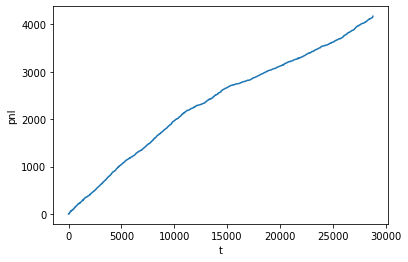

<Figure size 432x288 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt
plt.plot(PtfValue)
plt.xlabel('t')
plt.ylabel('pnl')
plt.savefig("pnl_market making_IH"+str(date_test)+"_1.png")
plt.figure()

In [23]:
####simulation of tweak market making

margin=0.05
ElasticFuture=0.1
MaxPos=5
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
#PtfValue=[0]
BidProp=[0]
AskProp=[0]
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0
buyvalue=0
sellvalue=0

#price_list=[]

for i in range(1,LenTest):
#     print(price_list)
#     print(pos0)
#     print(ptf_value)
#     print('BidPrice',data_test_simulation['Bid1Price'].iloc[i])
#     print('AskPrice',data_test_simulation['Ask1Price'].iloc[i])


    #ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture
    
    #judge if we realise some trades
    #buy
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        qty=min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
        pos1=pos0+qty
        buyvalue=buyvalue+qty*data_test_simulation['Bid1Price'].iloc[i]
    #sell       
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        qty=min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
        pos1=pos0-qty
        sellvalue=sellvalue+qty*data_test_simulation['Ask1Price'].iloc[i]
             
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    #PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1

if position[LenTest-1]==0:
    ptfvalue=sellvalue-buyvalue
else:
    ptfvalue=sellvalue-buyvalue+position[LenTest-1]*data_test_simulation['FairPrice'].iloc[LenTest-1]


add the weighted mean-reverting signal

In [115]:
return_freq=1
return_test=[0 for x in range(return_freq) ]
price_test=data_test_simulation['FairPrice']
price_test_1 = price_test[:(len(price_test)-return_freq)]
price_test_2 = price_test[return_freq:len(price_test)]
price_test_1.index = price_test_2.index
return_test_=(price_test_2/price_test_1-1)*100
return_test_ = return_test_.tolist()
return_test=return_test+return_test_
len(return_test)

28803

In [72]:
#simulation of tweak market making with signal
margin=0.05
ElasticFuture=0.1
MaxPos=5
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
PtfValue=[0]
BidProp=[0]
AskProp=[0]
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0

beta=5

price_list=[]

for i in range(1,LenTest):
#     print(price_list)
#     print(pos0)
#     print(ptf_value)
#     print('BidPrice',data_test_simulation['Bid1Price'].iloc[i])
#     print('AskPrice',data_test_simulation['Ask1Price'].iloc[i])

    signal=10*return_test[i]+9*return_test[i-1]+8*return_test[i-2]+7*return_test[i-3]+\
    6*return_test[i-4]+5*return_test[i-5]+4*return_test[i-6]+3*return_test[i-7]+\
    2*return_test[i-8]+1*return_test[i-9]

    #ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture-beta*np.sign(signal)

#     trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture
    
    #judge if we realise some trades
    #buy
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        qty=min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
        pos1=pos0+qty
        if(len(price_list)!=0 and price_list[0]<0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(data_test_simulation['Bid1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(data_test_simulation['Bid1Price'].iloc[i])
    #sell       
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        qty=min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
        pos1=pos0-qty
        if(len(price_list)!=0 and price_list[0]>0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
             
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    #print(i)
    #print(len(position))
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1

print('finished')

finished


In [97]:
#simulation of signal market making without tweak
margin=0.05
ElasticFuture=0.1
MaxPos=5000000000000
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
PtfValue=[0]
BidProp=[0]
AskProp=[0]
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0

beta=5

price_list=[]

for i in range(1,LenTest):
#     print(price_list)
#     print(pos0)
#     print(ptf_value)
#     print('BidPrice',data_test_simulation['Bid1Price'].iloc[i])
#     print('AskPrice',data_test_simulation['Ask1Price'].iloc[i])

    signal=10*return_test[i]+9*return_test[i-1]+8*return_test[i-2]+7*return_test[i-3]+\
    6*return_test[i-4]+5*return_test[i-5]+4*return_test[i-6]+3*return_test[i-7]+\
    2*return_test[i-8]+1*return_test[i-9]

    #ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-beta*signal

#     trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture
    
    #judge if we realise some trades
    #buy
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        qty=min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
        pos1=pos0+qty
        if(len(price_list)!=0 and price_list[0]<0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(data_test_simulation['Bid1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(data_test_simulation['Bid1Price'].iloc[i])
    #sell       
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        qty=min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
        pos1=pos0-qty
        if(len(price_list)!=0 and price_list[0]>0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
             
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    #print(i)
    #print(len(position))
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1

print('finished')

finished


In [ ]:
#simulation of signal market making without tweak
###ewma strategy to test pnl
margin=0.05
ElasticFuture=0.1
MaxPos=5000000000000
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
PtfValue=[0]
BidProp=[0]
AskProp=[0]
StgyPnl=[0]
stgy_add=0
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0
poscum_stgy=0

beta=5

price_list=[]

for i in range(1,LenTest):
#     print(price_list)
#     print(pos0)
#     print(ptf_value)
#     print('BidPrice',data_test_simulation['Bid1Price'].iloc[i])
#     print('AskPrice',data_test_simulation['Ask1Price'].iloc[i])

    signal=10*return_test[i]+9*return_test[i-1]+8*return_test[i-2]+7*return_test[i-3]+\
    6*return_test[i-4]+5*return_test[i-5]+4*return_test[i-6]+3*return_test[i-7]+\
    2*return_test[i-8]+1*return_test[i-9]

    #ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-beta*signal

#     trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture
    
    #judge if we realise some trades
    #buy
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        qty=min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
        pos1=pos0+qty
        if(len(price_list)!=0 and price_list[0]<0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])-data_test_simulation['Bid1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(data_test_simulation['Bid1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(data_test_simulation['Bid1Price'].iloc[i])
    #sell       
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        qty=min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
        pos1=pos0-qty
        if(len(price_list)!=0 and price_list[0]>0):
            if(len(price_list)>=qty):
                for j in range(qty):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
            else:
                len_price_list=len(price_list)
                for j in range(len_price_list):
                    ptf_value=ptf_value+(-price_list[0])+data_test_simulation['Ask1Price'].iloc[i]
                    price_list.pop(0)
                for j in range(qty-len_price_list):
                    price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
        else:
            for j in range(qty):
                price_list.append(-data_test_simulation['Ask1Price'].iloc[i])
             
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    if(i>30):
        position_short=DataFrame(position[-10:])
        ewm_short=position_short.ewm(alpha=2/(10+1),adjust=False).mean()[-1:].values[0][0]
        position_long=DataFrame(position[-30:])
        ewm_long=position_long.ewm(alpha=2/(30+1),adjust=False).mean()[-1:].values[0][0]
        if(i==31):
            position_stra0=-np.sign(ewm_short-ewm_long)
            sign_ewm=np.sign(ewm_short-ewm_long)
            fairprice_stra=-position_stra0*data_test_simulation['FairPrice'].iloc[i]
        elif((np.sign(ewm_short-ewm_long) != sign_ewm) and (np.sign(ewm_short-ewm_long) != 0)):
            position_stra1=-np.sign(ewm_short-ewm_long)+position_stra0
            poscum_stgy+=abs(position_stra1-position_stra0)
            if(position_stra1==0):
                stgy_add+=fairprice_stra+np.sign(ewm_short-ewm_long)*data_test_simulation['FairPrice'].iloc[i]
                sign_ewm=np.sign(ewm_short-ewm_long)
                position_stra0=0   
                print(i)
                print(position_stra1,stgy_add,fairprice_stra,ewm_short-ewm_long,-np.sign(ewm_short-ewm_long)*data_test_simulation['FairPrice'].iloc[i])
            else:
                position_stra0=-np.sign(ewm_short-ewm_long)
                sign_ewm=np.sign(ewm_short-ewm_long)
                fairprice_stra=-position_stra0*data_test_simulation['FairPrice'].iloc[i]
                print(i)
                print(position_stra1,stgy_add,fairprice_stra,ewm_short-ewm_long,-np.sign(ewm_short-ewm_long)*data_test_simulation['FairPrice'].iloc[i])

    StgyPnl.append(stgy_add)
            
    
    #print(i)
    #print(len(position))
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1

print('finished')

79
0.0 1.7216666666668061 -2727.653333333333 0.00517124276477432 -2729.375
80
1.0 1.7216666666668061 -2729.3818181818183 -0.15357693815497697 2729.3818181818183
82
0.0 1.4731818181817289 -2729.3818181818183 0.026379321774328446 -2729.133333333333
124
1.0 1.4731818181817289 -2728.9 -0.5703531386969303 2728.9
173
0.0 3.70651515151485 -2728.9 0.44427330948055754 -2731.133333333333
339
1.0 3.70651515151485 -2719.866666666667 -0.6516608227283385 2719.866666666667
392
0.0 4.739848484847698 -2719.866666666667 0.3841804591208522 -2720.8999999999996
515
1.0 4.739848484847698 -2717.7714285714287 -0.22795593392241642 2717.7714285714287
547
0.0 4.498854696028047 -2717.7714285714287 0.13802623524445323 -2717.530434782609
614
1.0 4.498854696028047 -2715.7 -0.02817497372176092 2715.7
673
0.0 5.19885469602832 -2715.7 0.3752143642941377 -2716.4
732
1.0 5.19885469602832 -2718.5333333333333 -1.0454503545441582 2718.5333333333333
854
0.0 8.305521362695345 -2718.5333333333333 0.03964699232871638 -2721.6400

3917
1.0 23.519012283540178 -2731.6 -0.22258269543465303 2731.6
3969
0.0 23.319012283539905 -2731.6 0.17361645069937026 -2731.3999999999996
4018
1.0 23.319012283539905 -2731.12 -0.20210302856189344 2731.12
4090
0.0 22.699012283540014 -2731.12 0.2417482999260585 -2730.5
4150
1.0 22.699012283540014 -2730.7 -0.22225339597983407 2730.7
4171
0.0 22.239012283540433 -2730.7 0.25728579888797753 -2730.2400000000002
4220
1.0 22.239012283540433 -2729.3 -0.16967477311797552 2729.3
4260
0.0 21.63901228354007 -2729.3 0.25706128806994855 -2728.7
4290
1.0 21.63901228354007 -2729.8999999999996 -0.14597295251410003 2729.8999999999996
4299
0.0 20.889012283540524 -2729.8999999999996 0.0986742735292978 -2729.15
4312
1.0 20.889012283540524 -2730.4 -0.032499215358640754 2730.4
4324
0.0 19.88901228354007 -2730.4 0.24371144815673063 -2729.3999999999996
4335
1.0 19.88901228354007 -2730.1499999999996 -0.07169441880994043 2730.1499999999996
4439
0.0 22.63901228354007 -2730.1499999999996 0.1030634996078561 -2732.8

7896
0.0 24.107249177363883 -2716.7 0.018968772837638426 -2717.1846153846154
8037
1.0 24.107249177363883 -2716.714285714286 -0.019221347659197363 2716.714285714286
8040
0.0 23.792963463078195 -2716.714285714286 0.10778117189494196 -2716.4
8063
1.0 23.792963463078195 -2716.6666666666665 -0.12917102894749632 2716.6666666666665
8151
0.0 24.00629679641179 -2716.6666666666665 0.4178693137938865 -2716.88
8233
1.0 24.00629679641179 -2716.7 -0.08788573864521254 2716.7
8253
0.0 24.106296796411698 -2716.7 0.1276112365062545 -2716.7999999999997
8255
1.0 24.106296796411698 -2716.866666666667 -0.051481421523135396 2716.866666666667
8372
0.0 23.839630129745274 -2716.866666666667 0.007035301788704373 -2716.6000000000004
8480
1.0 23.839630129745274 -2714.3 -0.31534718943197504 2714.3
8494
0.0 22.899630129744764 -2714.3 0.06250565830058008 -2713.3599999999997
8496
1.0 22.899630129744764 -2713.4 -0.13040061018324423 2713.4
8497
0.0 22.89963012974431 -2713.4 0.127838329763307 -2713.3999999999996
8499
1.0

10962
0.0 29.792694842810306 -2714.4 0.2907762630727291 -2712.7
10990
1.0 29.792694842810306 -2712.6 -0.3860483801431087 2712.6
10994
0.0 29.792694842810306 -2712.6 0.12977287872865872 -2712.6
11038
1.0 29.792694842810306 -2712.3599999999997 -0.014958230188653943 2712.3599999999997
11042
0.0 29.76602817614412 -2712.3599999999997 0.07590456517343114 -2712.3333333333335
11073
1.0 29.76602817614412 -2712.35 -0.239150687644468 2712.35
11084
0.0 29.71602817614439 -2712.35 0.11730205278593075 -2712.3
11097
1.0 29.71602817614439 -2712.5 -0.16175617927351027 2712.5
11134
0.0 29.71602817614439 -2712.5 0.2371147022262221 -2712.5
11290
1.0 29.71602817614439 -2711.3 -0.3259315811238537 2711.3
11312
0.0 29.71602817614439 -2711.3 0.38971310353463195 -2711.3
11327
1.0 29.71602817614439 -2712.266666666667 -0.2587374474090893 2712.266666666667


In [110]:
print(poscum)
PtfValue[-1]/poscum
print(poscum_stgy)
StgyPnl[-1]/poscum

12901
814.0


0.004797859037797505

In [55]:
from pandas.core.frame import DataFrame
a=[2,5,7,9]
df_a=DataFrame(a)
df_a.ewm(alpha=2/(4+1),adjust=False).mean()[-1:].values[0][0]
#df = pd.DataFrame({'B': [0, 1, 2, 3, 4]})
#df.ewm(alpha=2/(5+1),adjust=False).mean()


6.432

<Figure size 432x288 with 0 Axes>

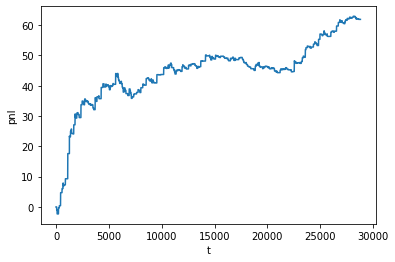

<Figure size 432x288 with 0 Axes>

In [111]:
import matplotlib.pyplot as plt
#plt.plot(PtfValue)
plt.plot(StgyPnl)
plt.xlabel('t')
plt.ylabel('pnl')
plt.savefig("pnl_position_simulation_IH"+str(date_test)+".png")
plt.figure()

<Figure size 432x288 with 0 Axes>

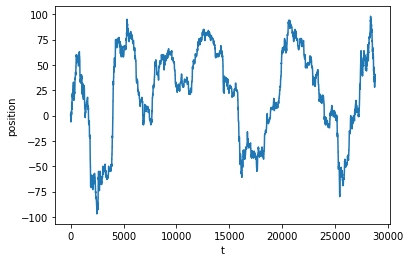

<Figure size 432x288 with 0 Axes>

In [104]:
plt.plot(position)
#plt.plot(range(24000,26000),pos[24000:26000])
plt.xlabel('t')
plt.ylabel('position')
#plt.title(name)
#plt.savefig("position_IH"+str(date_test)+"_2.png")
plt.figure()

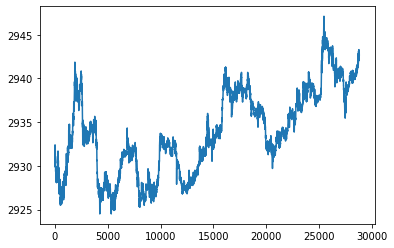

In [94]:
plt.plot(data_test_simulation['FairPrice'].values)
#plt.savefig("fairprice_IH"+str(date_test)+"_2.png")

In [99]:
print(len(position))
print(len(data_test_simulation['FairPrice']))
lag=1
position_diff=list(np.diff(position))
fairprice_diff=list(np.diff(data_test_simulation['FairPrice']))
print(np.corrcoef(position[:(-lag)],data_test_simulation['FairPrice'][lag:]))
#np.corrcoef(data_test_simulation['FairPrice'][:(-lag)],data_test_simulation['FairPrice'][lag:])
print(np.corrcoef(position_diff[:(-lag)],fairprice_diff[lag:]))

28802
28802
[[ 1.         -0.63014294]
 [-0.63014294  1.        ]]
[[ 1.         -0.01673657]
 [-0.01673657  1.        ]]


In [4]:
a=[1,3,7]
list(np.diff(a))

[2, 4]

In [31]:
margin=0.05
ElasticFuture=0.1
MaxPos=5
PropSize=2
LenTest=data_test_simulation.shape[0]

TradePrice=[data_test_simulation['FairPrice'].iloc[0]-1*0*ElasticFuture]
position=[0]
#PtfValue=[0]
BidProp=[0]
AskProp=[0]
ptf_value=0
pos0=0
pos1=0
bid_prop=0
ask_prop=0
poscum=0
buyvalue=0
sellvalue=0

beta=0.5

#price_list=[]

for i in range(10,LenTest):
#     print(price_list)
#     print(pos0)
#     print(ptf_value)
#     print('BidPrice',data_test_simulation['Bid1Price'].iloc[i])
#     print('AskPrice',data_test_simulation['Ask1Price'].iloc[i])
    signal=10*return_test[i]+9*return_test[i-1]+8*return_test[i-2]+7*return_test[i-3]+\
    6*return_test[i-4]+5*return_test[i-5]+4*return_test[i-6]+3*return_test[i-7]+\
    2*return_test[i-8]+1*return_test[i-9]

    #ptf_value = ptf_value+pos0*(data_test_simulation['FairPrice'].iloc[i]-data_test_simulation['FairPrice'].iloc[i-1]) ###???which price to use
    
    trade_price = data_test_simulation['FairPrice'].iloc[i]-1*pos0*ElasticFuture-beta*signal
    
    #judge if we realise some trades
    #buy
    if(bid_prop!=0 and data_test_simulation['LastPrice'].iloc[i]<=data_test_simulation['Bid1Price'].iloc[i-1]):
        qty=min(bid_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,MaxPos-pos0))
        pos1=pos0+qty
        buyvalue=buyvalue+qty*data_test_simulation['Bid1Price'].iloc[i]
    #sell       
    if(ask_prop!=0 and data_test_simulation['LastPrice'].iloc[i]>=data_test_simulation['Ask1Price'].iloc[i-1]):
        qty=min(ask_prop,data_test_simulation['LastQty'].iloc[i]-data_test_simulation['LastQty'].iloc[i-1],max(0,pos0+MaxPos))
        pos1=pos0-qty
        sellvalue=sellvalue+qty*data_test_simulation['Ask1Price'].iloc[i]
             
 
    #judge if or not join best bid/ask
    if (trade_price-margin)>=data_test_simulation['Bid1Price'].iloc[i]:
        bid_prop=PropSize
    else:bid_prop=0
    if (trade_price+margin)<=data_test_simulation['Ask1Price'].iloc[i]:
        ask_prop=PropSize
    else:ask_prop=0
        
    #PtfValue.append(ptf_value)
    TradePrice.append(trade_price)
    position.append(pos1)
    BidProp.append(bid_prop)
    AskProp.append(ask_prop)
    
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    i+=1

if position[-1]==0:
    ptfvalue=sellvalue-buyvalue
else:
    ptfvalue=sellvalue-buyvalue+position[-1]*data_test_simulation['FairPrice'].iloc[LenTest-1]

In [32]:
print(poscum)
ptfvalue

12899


3172.3999999858434

In [102]:
def predict_one_tree(KTreeNode_,data):
    d = len(data)
    node = KTreeNode_
    for pos in range(1, d):
        if (node.children[data[-pos]]==None):
            break
        node = node.children[data[-pos]]
    sum_=sum(node.count)
    #print(node.count)
    prob_pred = [c/sum_ for c in node.count]
    return prob_pred 


def predict_weighted_trees(trees,data):
    n = len(trees)
    m = trees[0][0].m
    prob = [0. for _ in range(m)]
    sum_weight = 0.
    for i in range(0,n):
        prob_pred = predict_one_tree(trees[i][0],data)
        sum_weight += trees[i][1]
        for j in range(0,m):
            prob[j] += trees[i][1] * prob_pred[j]
    prob_weighted = [p/sum_weight for p in prob]
    return prob_weighted 

In [4]:
def flexible_test(date_test,freq,num_train_days):
    
    date_test_d = datetime(year=int(str(date_test)[0:4]), month=int(str(date_test)[4:6]), day=int(str(date_test)[6:8]))
    date_date =  date_test_d-timedelta(days=1)  
    date = 10000*date_date.year + 100*date_date.month + date_date.day
    i = 0
    return_train=[]
    
    while i<num_train_days:
        path = './input_data/Future/mid_volume_train_IH_1min_'+str(date)+'.txt'
        #path = './input_data/Future/2mid_volume_train_IC_'+str(date)+'.txt'
        date_date = datetime(year=int(str(date)[0:4]), month=int(str(date)[4:6]), day=int(str(date)[6:8]))
        if os.access(path, os.F_OK):
            i += 1  
            f = open(path, "rb")  
            price_train = pickle.load(f)
            f.close()
            price_index = [x * freq for x in list(range(int(len(price_train)/freq)))]
            price_train_ = price_train.iloc[price_index]

            price_train_1 = price_train_[:(len(price_train_)-1)]
            price_train_2 = price_train_[1:len(price_train_)]
            price_train_1.index = price_train_2.index
            return_train_ = (price_train_2/price_train_1-1)*100
            locals()['return_train'+str(i)] = return_train_.tolist()
            return_train.extend(locals()['return_train'+str(i)])
        date_date =  date_date-timedelta(days=1) 
        date = 10000*date_date.year + 100*date_date.month + date_date.day


    
    return_train_class_total = []
    thres1 = np.percentile(return_train,25)
    thres2 = np.percentile(return_train,50)
    thres3 = np.percentile(return_train,75)
    for d in return_train:
        v = None
        if d <= thres1:
            v = 0
        elif thres1 < d and d <= thres2:
            v = 1
        elif thres2 < d and d <= thres3:
            v = 2
        elif d > thres3:
            v = 3
        return_train_class_total.append(v)

    fileObject = open('return_class_train.txt', 'w')
    fileObject.write('[')
    for ip in return_train_class_total[:-1]:
        ip=str(ip)
        fileObject.write(ip)
        fileObject.write(',')
    fileObject.write(str(return_train_class_total[-1]))
    fileObject.write(']')
    fileObject.close()
    
    D = 9
    beta = Fraction(1, 2)
    top, trees = ktree_main(return_train_class_total, m=max(return_train_class_total)+1, D=D, k=5, beta=beta)

    pw = top.pw
    trees_probs = [(t, t.compute_pi_T_x(beta, D, pw)) for t, _ in trees]
    # print(graphviz.multiple_trees_to_html(trees_probs, only_struct=True))
    
    path = './input_data/Future/mid_volume_train_IH_1min_'+str(date_test)+'.txt'
    #path = './input_data/Future/2mid_volume_train_IC_'+str(date_test)+'.txt'
    f = open(path, "rb")  
    price_test = pickle.load(f)
    price_index = [x * freq for x in list(range(int(len(price_test)/freq)))]
    price_test_ = price_test.iloc[price_index]
    price_test_1 = price_test_[:(len(price_test_)-1)]
    price_test_2 = price_test_[1:len(price_test_)]
    price_test_1.index = price_test_2.index
    return_test = (price_test_2/price_test_1-1)*100
    price_test_1=price_test_1.tolist()
    return_test = return_test.tolist()
   
    return_test_class_total = []

    for d in return_test:
        v = None
        if d <= thres1:
            v = 0
        elif thres1 < d and d <= thres2:
            v = 1
        elif thres2 < d and d <= thres3:
            v = 2
        elif d > thres3:
            v = 3
        return_test_class_total.append(v)

    return_test_class_input = return_test_class_total[(10-10):]
    return_test_class_real = return_test_class_total[10:]
    return_test_real = return_test[10:]
    price_test_real = price_test_1[10:]
    
    return_test_class_predicted_one=[]
    for i in range(10, len(return_test_class_input)):
        pred_prob = predict_one_tree(trees_probs[0][0],return_test_class_input[(i-10):i])
        return_test_class_predicted_one.append(pred_prob.index(max(pred_prob)))

    co = 0
    for i in range(len(return_test_class_predicted_one)):
        if (return_test_class_predicted_one[i] == return_test_class_real[i]):
            co += 1
    class_correct_rate=co/len(return_test_class_predicted_one)
    
    co1,co2,sum1,sum2 = 0,0,0,0
    for i in range(len(return_test_class_predicted_one)):
        if (return_test_class_real[i] in range(2,4)):
            sum2 += 1
            if (return_test_class_predicted_one[i] in range(2,4)):
                co2 += 1
        elif (return_test_class_real[i] in range(0,2)):
            sum1 += 1
            if (return_test_class_predicted_one[i] in range(0,2)):
                co1 += 1
    #print(co1,sum1,co2,sum2)
    direction_correct_rate=(co1+co2)/(sum1+sum2)
    print(co1,sum1,co2,sum2)
    
    portf_value = []
    portf_value.append(1.)
    pt_value=0.
    len_test= len(return_test_class_real)
    pos0=0
    pos1=0
    poscum=0
    profit=[]
    for i in range(len_test-1): #4788-1
        if(return_test_class_predicted_one[i+1] in range(2,4)):
            pt_value = pt_value+price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
            #print([+1,return_test_class_predicted_one[i+1],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
            pos1=1
        else:
            pt_value = pt_value-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
            #print([-1,return_test_class_predicted_one[i+1],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
            pos1=-1
        profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
        poscum=poscum+abs(pos1-pos0)
        pos0=pos1
        portf_value.append(pt_value)
        
    import matplotlib.pyplot as plt
    plt.plot(portf_value)
    plt.xlabel('t')
    plt.ylabel('pnl')
    name="pnl_IH_"+str(date_test)
    plt.title(name)
    plt.savefig(name+".png")
    plt.figure()
    
    cor = np.corrcoef([return_test_class_predicted_one,return_test_class_real])[0,1]
    return class_correct_rate, direction_correct_rate, cor, poscum
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


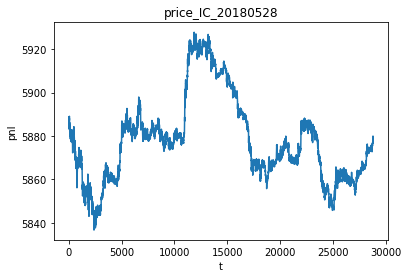

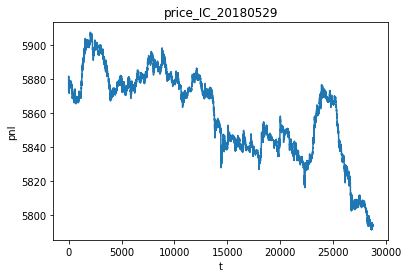

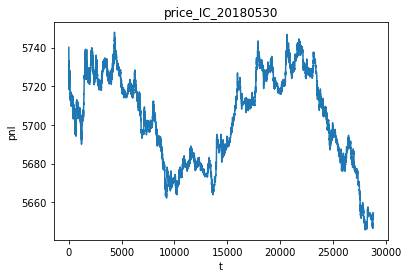

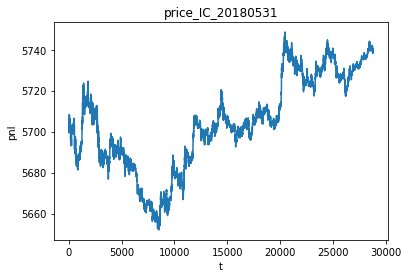

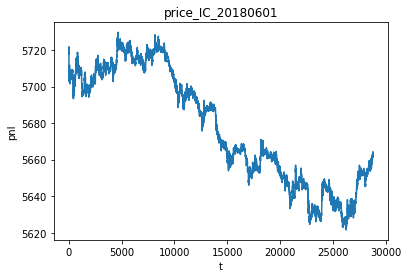

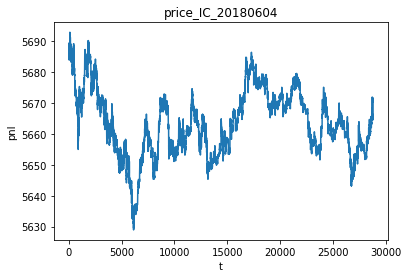

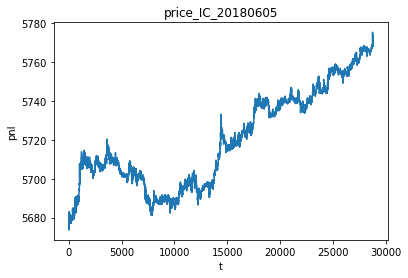

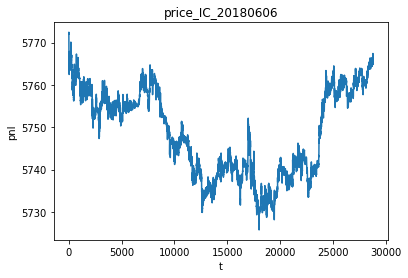

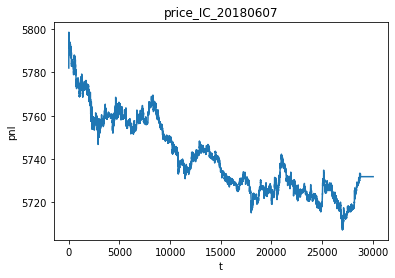

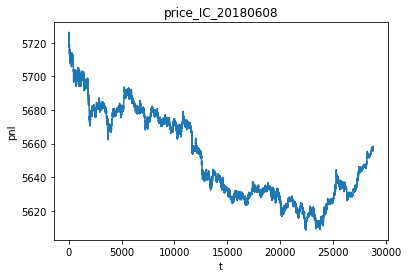

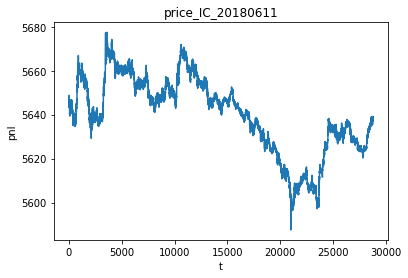

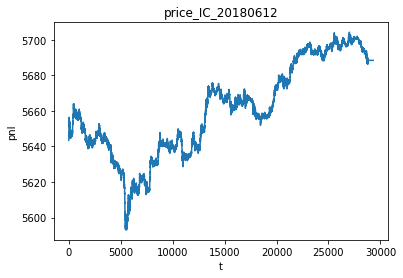

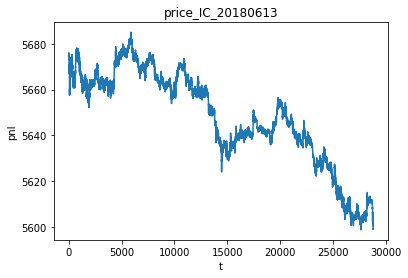

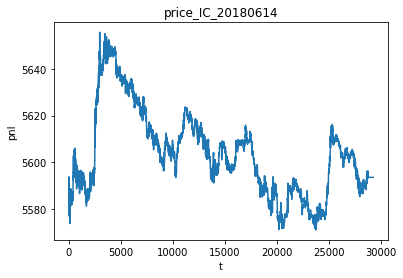

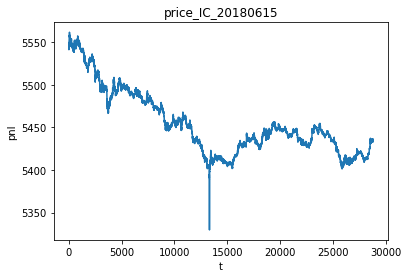

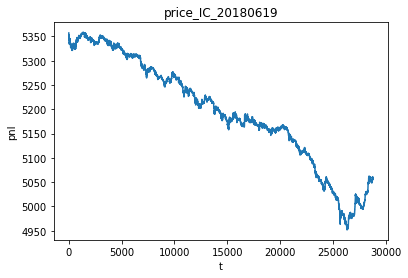

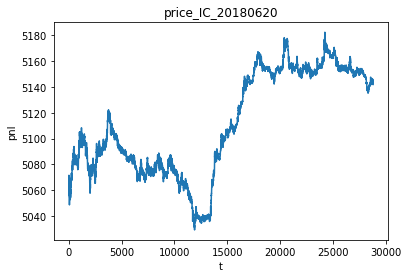

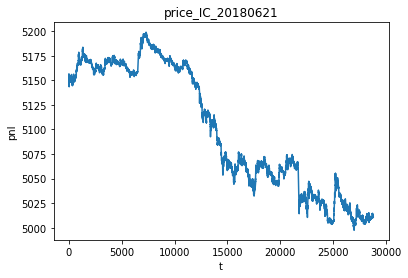

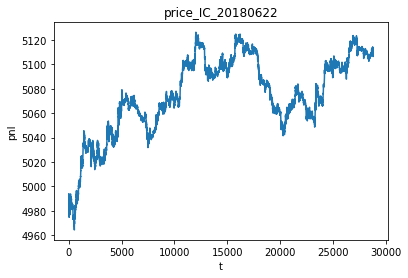

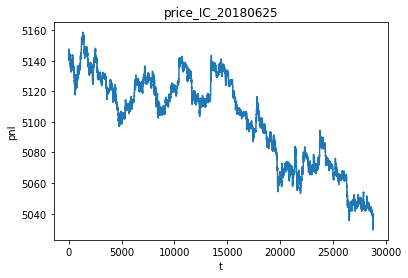

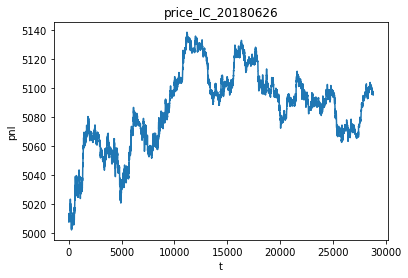

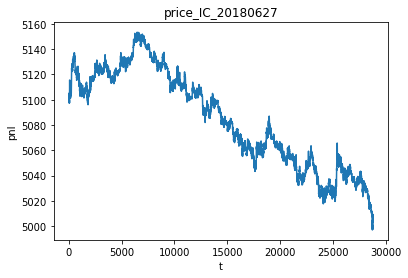

<Figure size 432x288 with 0 Axes>

In [130]:
####draw the plot of price

freq=1
date_start=20180527
date_end=20180628
date=date_start
while date<date_end:
    #path = './input_data/Future/mid_volume_train_IH_1min_'+str(date)+'.txt'
    path = './input_data/Future/2mid_volume_train_IC_'+str(date)+'.txt'
    date_date = datetime(year=int(str(date)[0:4]), month=int(str(date)[4:6]), day=int(str(date)[6:8]))
    if os.access(path, os.F_OK):
        #path = './input_data/Future/2mid_volume_train_IC_'+str(date_test)+'.txt'
        f = open(path, "rb")  
        price_test = pickle.load(f)
        price_index = [x * freq for x in list(range(int(len(price_test)/freq)))]
        price_test_ = price_test.iloc[price_index]
        price_test_list=price_test_.tolist()
        import matplotlib.pyplot as plt
        plt.plot(price_test_list)
        plt.xlabel('t')
        plt.ylabel('pnl')
        name="price_IC_"+str(date)
        plt.title(name)
        #plt.xticks(test_time)
        plt.savefig(name+".png")
        plt.figure()
    date_date =  date_date+timedelta(days=1)  
    date = 10000*date_date.year + 100*date_date.month + date_date.day


20190326
20190325
20190322
20190321
20190320
20190319
20190318
20190315
20190314
20190313
20190312
20190311
20190308
20190307
20190306
20190305
20190304
20190301
20190228
20190227
20190226
20190225
20190222
20190221
20190220
20190219
20190218
20190215
20190214
20190213
20190212
20190211
20190201
20190131
20190130
20190129
20190128
20190125
20190124
20190123
20190122
20190121
20190118
20190117
20190116
20190115
20190114
20190111
20190110
20190109
20190108
20190107
20190104
20190103
20190102
20181228
20181227
20181226
20181225
20181224
20181221
20181220
20181219
20181218
20181217
20181214
20181213
20181212
20181211
20181210
20181207
20181206
20181205
20181204
20181203
20181130
20181129
20181128
20181127
20181126
20181123
20181122
20181121
20181120
20181119
20181116
20181115
20181114
20181113
20181112
20181109
20181108
20181107
20181106
20181105
20181102
20181101
20181031
20181030
20181029
20181026
20181025
20181024
20181023
20181022
20181019
20181018
20181017
20181016
20181015
20181012
2

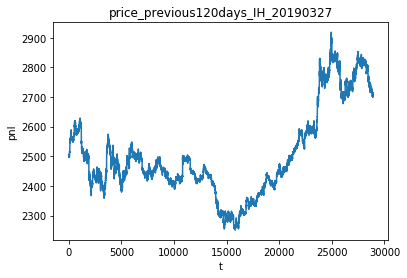

<Figure size 432x288 with 0 Axes>

In [63]:
####draw the price of previous n days

import matplotlib.pyplot as plt

freq=120
num_days=120
date_start=20190327
date_end=20190328
date=date_start
while date<date_end:
    path = './input_data/Future/mid_volume_train_IH_1min_'+str(date)+'.txt'
    date_date = datetime(year=int(str(date)[0:4]), month=int(str(date)[4:6]), day=int(str(date)[6:8]))
    if os.access(path, os.F_OK):
        #path = './input_data/Future/2mid_volume_train_IC_'+str(date_test)+'.txt'
        date_train=date
        i=0
        price_test_list=[]
        while i<num_days:
            date_date_train = datetime(year=int(str(date_train)[0:4]), month=int(str(date_train)[4:6]), day=int(str(date_train)[6:8]))
            date_date_train =  date_date_train-timedelta(days=1) 
            date_train = 10000*date_date_train.year + 100*date_date_train.month + date_date_train.day
            path = './input_data/Future/mid_volume_train_IH_1min_'+str(date_train)+'.txt'
            if os.access(path, os.F_OK):
                print(date_train)
                f = open(path, "rb")  
                price_test = pickle.load(f)
                price_index = [x * freq for x in list(range(int(len(price_test)/freq)))]
                price_test_ = price_test.iloc[price_index]
                locals()['price_test_'+str(i)]=price_test_.tolist()
                i+=1
        while i>0:
            price_test_list.extend(locals()['price_test_'+str(i-1)]) 
            i-=1
        plt.plot(price_test_list)
        plt.xlabel('t')
        plt.ylabel('pnl')
        name="price_previous"+str(num_days)+"days_IH_"+str(date)
        plt.title(name)
        #plt.xticks(test_time)
        plt.savefig(name+".png")
        plt.figure()
    date_date =  date_date+timedelta(days=1)  
    date = 10000*date_date.year + 100*date_date.month + date_date.day

Building full tree
Building counts
Computing probas
Building matrix
Extracting tree 0
Extracting tree 1
Extracting tree 2
Extracting tree 3
Extracting tree 4


93 106 26 123


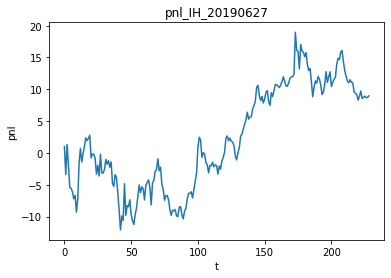

<Figure size 432x288 with 0 Axes>

In [12]:
x,y,z,p=flexible_test(20190627,120,120)

In [1]:
#print('This is a \033[1;35mtest\033[0m!')

In [26]:
# from datetime import datetime, timedelta
# test_time=price_test_.index
# test_time=[datetime.utcfromtimestamp(x / 1000000.0) for x in test_time]
# test_time[13500:]

In [97]:
def IH_market_making_1(date_test):
    freq=1
    num_train_days=1


    date_test_d = datetime(year=int(str(date_test)[0:4]), month=int(str(date_test)[4:6]), day=int(str(date_test)[6:8]))
    date_date =  date_test_d-timedelta(days=1)  
    date = 10000*date_date.year + 100*date_date.month + date_date.day
    i = 0
    return_train=[]

    while i<num_train_days:
        #path = './input_data/Future/mid_volume_train_IH_1min_'+str(date)+'.txt'
        path = './input_data/Future/2mid_volume_train_IC_'+str(date)+'.txt'
        date_date = datetime(year=int(str(date)[0:4]), month=int(str(date)[4:6]), day=int(str(date)[6:8]))
        if os.access(path, os.F_OK):
            i += 1  
            f = open(path, "rb")  
            price_train = pickle.load(f)
            f.close()
            price_index = [x * freq for x in list(range(int(len(price_train)/freq)))]
            price_train_ = price_train.iloc[price_index]

            price_train_1 = price_train_[:(len(price_train_)-1)]
            price_train_2 = price_train_[1:len(price_train_)]
            price_train_1.index = price_train_2.index
            return_train_ = (price_train_2/price_train_1-1)*100
            locals()['return_train'+str(i)] = return_train_.tolist()
            return_train.extend(locals()['return_train'+str(i)])
        date_date =  date_date-timedelta(days=1) 
        date = 10000*date_date.year + 100*date_date.month + date_date.day


    return_train_class_total = []
    thres1 = np.percentile(return_train,25)
    thres2 = np.percentile(return_train,50)
    thres3 = np.percentile(return_train,75)
    for d in return_train:
        v = None
        if d <= thres1:
            v = 0
        elif thres1 < d and d <= thres2:
            v = 1
        elif thres2 < d and d <= thres3:
            v = 2
        elif d > thres3:
            v = 3
        return_train_class_total.append(v)
    
    #path = './input_data/Future/mid_volume_train_IH_1min_'+str(date_test)+'.txt'
    path = './input_data/Future/2mid_volume_train_IC_'+str(date_test)+'.txt'
    f = open(path, "rb")  
    price_test = pickle.load(f)
    price_index = [x * freq for x in list(range(int(len(price_test)/freq)))]
    price_test_ = price_test.iloc[price_index]
    price_test_1 = price_test_[:(len(price_test_)-1)]
    price_test_2 = price_test_[1:len(price_test_)]
    price_test_1.index = price_test_2.index
    return_test = (price_test_2/price_test_1-1)*100
    price_test_1=price_test_1.tolist()
    return_test = return_test.tolist()

    return_test_class_total = []

    for d in return_test:
        v = None
        if d <= thres1:
            v = 0
        elif thres1 < d and d <= thres2:
            v = 1
        elif thres2 < d and d <= thres3:
            v = 2
        elif d > thres3:
            v = 3
        return_test_class_total.append(v)

    return_test_class_input = return_test_class_total[(10-10):]
    return_test_class_real = return_test_class_total[10:]
    return_test_real = return_test[10:]
    price_test_real = price_test_1[10:]
    
    portf_value = []
    portf_value.append(1.)
    pt_value=0.
    len_test= len(return_test_class_real)
    pos0=0
    pos1=0
    poscum=0
    maxpos=5
    pos=[]
    profit=[]
    
    #mean_reverting market making 1： never eliminate position 
    for i in range(len_test-1): #4788-1
        if(return_test_class_real[i] is 0):
            if(pos0<maxpos):
                pos1=pos0+1
            pos.append(pos1)
            pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
            #print([+1,return_test_class_predicted_one[i+1],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
        elif(return_test_class_real[i] is 3):
            if(pos0>-maxpos):
                pos1=pos0-1
            pos.append(pos1)
            pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
            #print([-1,return_test_class_predicted_one[i+1],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])

        profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
        poscum=poscum+abs(pos1-pos0)
        pos0=pos1
        portf_value.append(pt_value)
        
    
#     #mean_reverting market making 2： eliminate one position if 1 or 2
#     for i in range(len_test-1): #4788-1
#         if(return_test_class_real[i] is 0):
#             if(pos0<maxpos):
#                 pos1=pos0+1
#             pos.append(pos1)
#             pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
#             #print([+1,return_test_class_predicted_one[i+1],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
#         elif(return_test_class_real[i] is 3):
#             if(pos0>-maxpos):
#                 pos1=pos0-1
#             pos.append(pos1)
#             pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
#             #print([-1,return_test_class_predicted_one[i+1],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
#         elif(return_test_class_real[i] in [1,2]):
#             pos1=pos0-np.sign(pos0)
#             pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100 
#             pos.append(pos1)

#         profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
#         poscum=poscum+abs(pos1-pos0)
#         pos0=pos1
#         portf_value.append(pt_value)
        
#     #mean_reverting market making 3： eliminate all positions if 1 or 2
#     for i in range(len_test-1): #4788-1
#         if(return_test_class_real[i] is 0):
#             if(pos0<maxpos):
#                 pos1=pos0+1
#             pos.append(pos1)
#             pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
#             #print([pos1,return_test_class_real[i],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
#         elif(return_test_class_real[i] is 3):
#             if(pos0>-maxpos):
#                 pos1=pos0-1
#             pos.append(pos1)
#             pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
#             #print([pos1,return_test_class_real[i],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
#         elif(return_test_class_real[i] in [1,2]):
#             pos1=0  
#             pos.append(pos1)
#             #print([pos1,return_test_class_real[i],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])

#         profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
#         poscum=poscum+abs(pos1-pos0)
#         pos0=pos1
#         portf_value.append(pt_value)
    

    import matplotlib.pyplot as plt
    plt.plot(portf_value)
    plt.xlabel('t')
    plt.ylabel('pnl')
    name="market_making1_IC_"+str(date_test)
    plt.title(name)
    plt.savefig(name+".png")
    plt.figure()
    
    return poscum

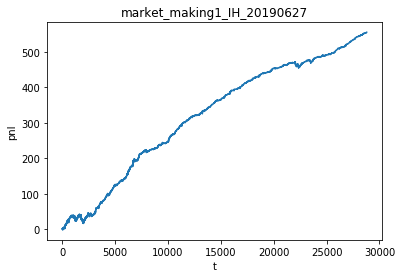

<Figure size 432x288 with 0 Axes>

In [55]:
a=IH_market_making_1(20190627)

20180528
20180529
20180530
20180531
20180601
20180604
20180605
20180606
20180607
20180608
20180611
20180612
20180613
20180614
20180615
20180619
20180620
20180621
20180622


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


20180625
20180626
20180627


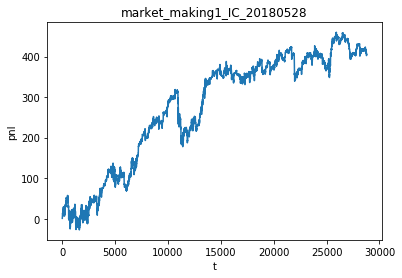

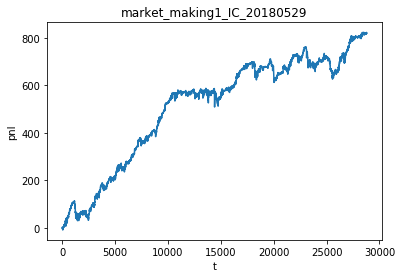

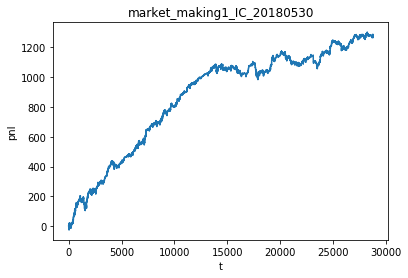

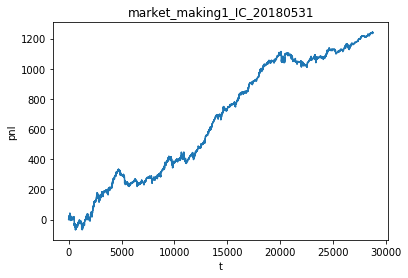

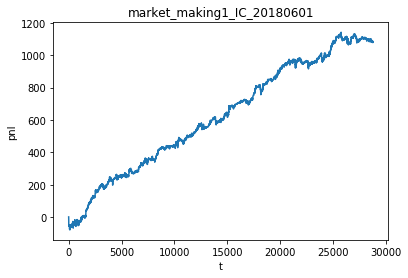

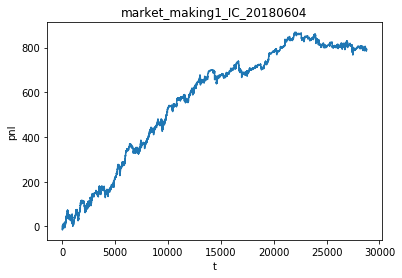

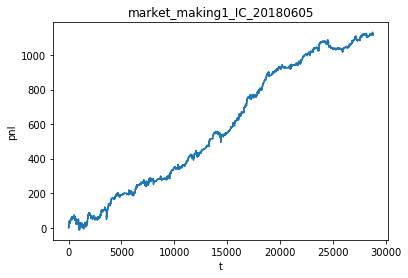

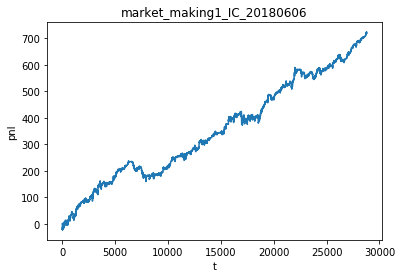

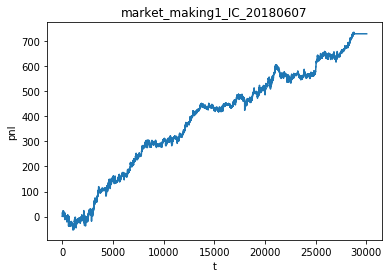

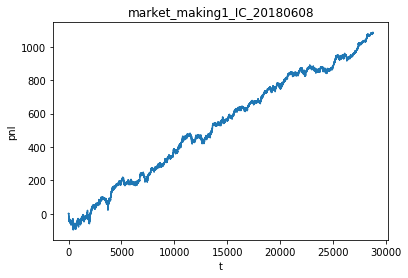

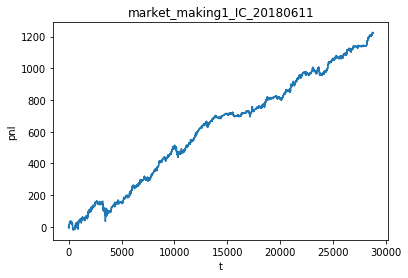

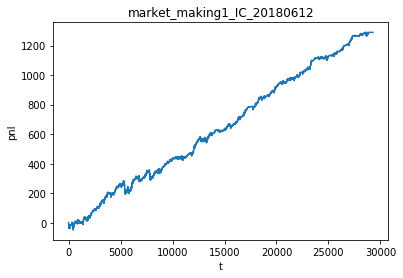

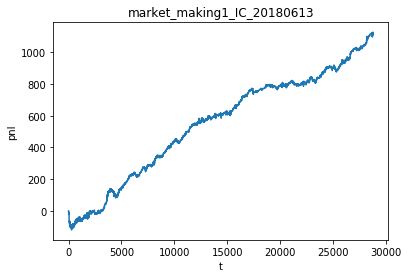

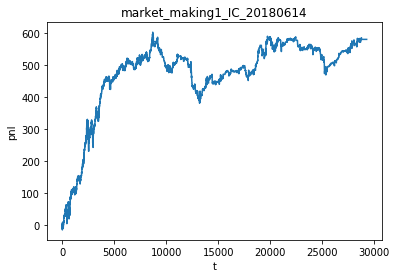

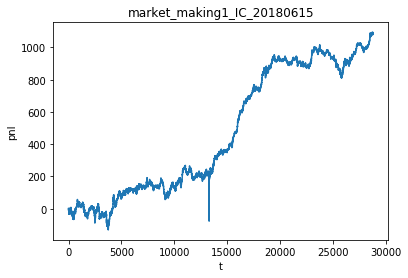

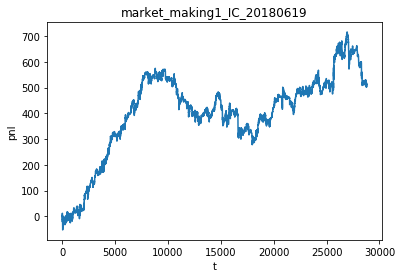

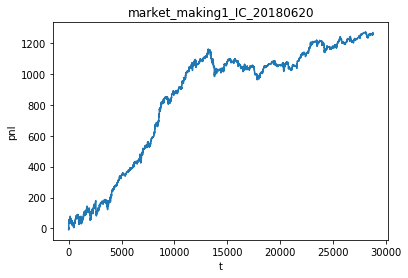

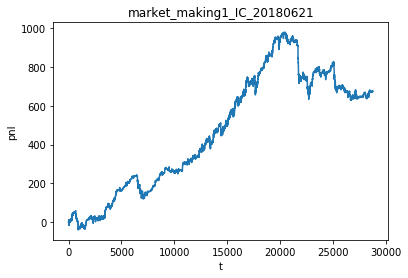

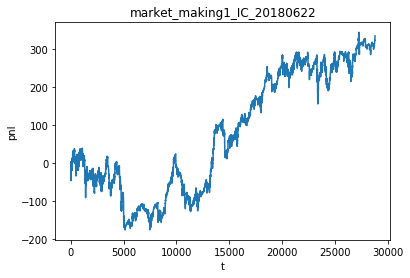

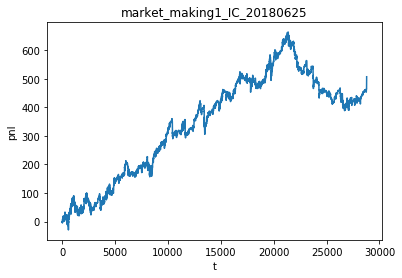

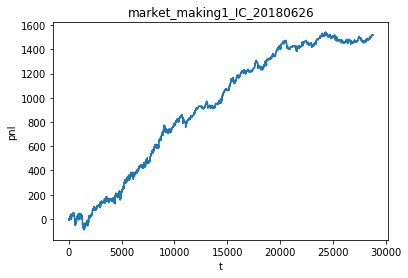

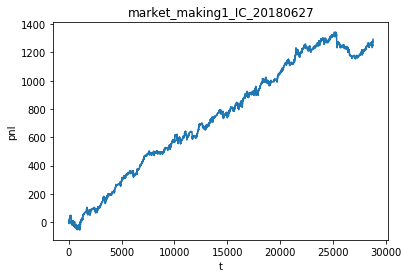

<Figure size 432x288 with 0 Axes>

In [99]:
date_start=20180527
date_end=20180627
date_test=date_start
poscum_=[]
date_test_=[]
while date_test<=date_end:
    #path = './input_data/Future/mid_volume_train_IH_1min_'+str(date_test)+'.txt'    
    path = './input_data/Future/2mid_volume_train_IC_'+str(date_test)+'.txt'
    if os.access(path, os.F_OK):
        date_test_.append(date_test)
        p=IH_market_making_1(date_test)
        poscum_.append(p)
        print(date_test)
    date_date = datetime(year=int(str(date_test)[0:4]), month=int(str(date_test)[4:6]), day=int(str(date_test)[6:8]))
    date_date =  date_date+timedelta(days=1) 
    date_test = 10000*date_date.year + 100*date_date.month + date_date.day
    
result=np.vstack((date_test_,poscum_))
np.savetxt('market_making1_IC_'+str(date_start)+'_to_'+str(date_end)+'.csv', result, delimiter = ',')

In [120]:
date_test=20190627
freq=1
num_train_days=1


date_test_d = datetime(year=int(str(date_test)[0:4]), month=int(str(date_test)[4:6]), day=int(str(date_test)[6:8]))
date_date =  date_test_d-timedelta(days=1)  
date = 10000*date_date.year + 100*date_date.month + date_date.day
i = 0
return_train=[]

while i<num_train_days:
    path = './input_data/Future/mid_volume_train_IH_1min_'+str(date)+'.txt'
    #path = './input_data/Future/2mid_volume_train_IC_'+str(date)+'.txt'
    date_date = datetime(year=int(str(date)[0:4]), month=int(str(date)[4:6]), day=int(str(date)[6:8]))
    if os.access(path, os.F_OK):
        i += 1  
        f = open(path, "rb")  
        price_train = pickle.load(f)
        f.close()
        price_index = [x * freq for x in list(range(int(len(price_train)/freq)))]
        price_train_ = price_train.iloc[price_index]

        price_train_1 = price_train_[:(len(price_train_)-1)]
        price_train_2 = price_train_[1:len(price_train_)]
        price_train_1.index = price_train_2.index
        return_train_ = (price_train_2/price_train_1-1)*100
        locals()['return_train'+str(i)] = return_train_.tolist()
        return_train.extend(locals()['return_train'+str(i)])
    date_date =  date_date-timedelta(days=1) 
    date = 10000*date_date.year + 100*date_date.month + date_date.day
    
    
return_train_class_total = []
thres1 = np.percentile(return_train,25)
thres2 = np.percentile(return_train,50)
thres3 = np.percentile(return_train,75)
for d in return_train:
    v = None
    if d <= thres1:
        v = 0
    elif thres1 < d and d <= thres2:
        v = 1
    elif thres2 < d and d <= thres3:
        v = 2
    elif d > thres3:
        v = 3
    return_train_class_total.append(v)

# fileObject = open('return_class_train.txt', 'w')
# fileObject.write('[')
# for ip in return_train_class_total[:-1]:
#     ip=str(ip)
#     fileObject.write(ip)
#     fileObject.write(',')
# fileObject.write(str(return_train_class_total[-1]))
# fileObject.write(']')
# fileObject.close()



In [121]:
path = './input_data/Future/mid_volume_train_IH_1min_'+str(date_test)+'.txt'
#path = './input_data/Future/2mid_volume_train_IC_'+str(date_test)+'.txt'
f = open(path, "rb")  
price_test = pickle.load(f)
price_index = [x * freq for x in list(range(int(len(price_test)/freq)))]
price_test_ = price_test.iloc[price_index]
price_test_1 = price_test_[:(len(price_test_)-1)]
price_test_2 = price_test_[1:len(price_test_)]
price_test_1.index = price_test_2.index
return_test = (price_test_2/price_test_1-1)*100
price_test_1=price_test_1.tolist()
return_test = return_test.tolist()

return_test_class_total = []

for d in return_test:
    v = None
    if d <= thres1:
        v = 0
    elif thres1 < d and d <= thres2:
        v = 1
    elif thres2 < d and d <= thres3:
        v = 2
    elif d > thres3:
        v = 3
    return_test_class_total.append(v)

return_test_class_input = return_test_class_total[(10-10):]
return_test_class_real = return_test_class_total[10:]
return_test_real = return_test[10:]
price_test_real = price_test_1[10:]

In [122]:
#mean_reverting market making 1: don't eliminate position

portf_value = []
portf_value.append(1.)
pt_value=0.
len_test= len(return_test_class_real)
pos0=0
pos1=0
poscum=0
maxpos=5
pos=[]
profit=[]
for i in range(len_test-1): #4788-1
    if(return_test_class_real[i] is 0):
        if(pos0<maxpos):
            pos1=pos0+1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
        #print([+1,return_test_class_predicted_one[i+1],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
    elif(return_test_class_real[i] is 3):
        if(pos0>-maxpos):
            pos1=pos0-1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
        #print([-1,return_test_class_predicted_one[i+1],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])

    profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    portf_value.append(pt_value)

In [32]:
np.sign(0)

0

In [33]:
#mean_reverting market making 2： eliminate one position if 1 or 2


portf_value = []
portf_value.append(1.)
pt_value=0.
len_test= len(return_test_class_real)
pos0=0
pos1=0
poscum=0
maxpos=5
pos=[]
profit=[]
for i in range(len_test-1): #4788-1
    if(return_test_class_real[i] is 0):
        if(pos0<maxpos):
            pos1=pos0+1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
        #print([+1,return_test_class_predicted_one[i+1],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
    elif(return_test_class_real[i] is 3):
        if(pos0>-maxpos):
            pos1=pos0-1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
        #print([-1,return_test_class_predicted_one[i+1],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
    elif(return_test_class_real[i] in [1,2]):
        pos1=pos0-np.sign(pos0)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100 
        pos.append(pos1)

    profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    portf_value.append(pt_value)

In [46]:
#mean_reverting market making 3： eliminate all positions if 1 or 2


portf_value = []
portf_value.append(1.)
pt_value=0.
len_test= len(return_test_class_real)
pos0=0
pos1=0
poscum=0
maxpos=5
pos=[]
profit=[]
for i in range(len_test-1): #4788-1
    if(return_test_class_real[i] is 0):
        if(pos0<maxpos):
            pos1=pos0+1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
        print([pos1,return_test_class_real[i],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
    elif(return_test_class_real[i] is 3):
        if(pos0>-maxpos):
            pos1=pos0-1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
        print([pos1,return_test_class_real[i],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
    elif(return_test_class_real[i] in [1,2]):
        pos1=0  
        pos.append(pos1)
        print([pos1,return_test_class_real[i],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])

    profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    portf_value.append(pt_value)

[1, 0, 0.09999999999985895, 2894.4, 3.454947484793358e-05]
[0, 3, 0.04285714285707809, 2894.5, -1.480640623841012e-05]
[0, 1, 0.17714285714329217, 2894.457142857143, -6.120071861503984e-05]
[1, 0, -0.4799999999995494, 2894.2799999999997, -0.00016584435507260853]
[2, 0, 0.25000000000004763, 2893.8, 8.639159582557454e-05]
[1, 3, -0.01666666666621912, 2894.05, 5.75894219734252e-06]
[0, 2, -0.2533333333336964, 2894.0666666666666, 8.753541729067393e-05]
[-1, 3, -0.329999999999788, 2894.32, 0.0001140164183641712]
[-2, 3, 0.1499999999995193, 2894.6499999999996, -5.1819736410108064e-05]
[-1, 0, 0.20000000000034046, 2894.5, 6.909656244613593e-05]
[-2, 3, 0.1000000000003228, 2894.7000000000003, -3.4545894220583406e-05]
[-1, 0, 0.366666666666792, 2894.6, 0.0001266726548285746]
[-2, 3, -0.3333333333337748, 2894.9666666666667, 0.00011514237354504075]
[-3, 3, 0.4000000000000245, 2895.3, -0.0001381549407660776]
[-2, 0, 0.6000000000000811, 2894.9, 0.00020726104528656641]
[-3, 3, 0.3800000000000489, 28

[-5, 3, -0.333333333334212, 2916.2666666666664, 0.00011430138990520256]
[-5, 3, -0.22222222222201846, 2916.6000000000004, 7.61922177268115e-05]
[-5, 3, -0.044444444444414345, 2916.8222222222225, 1.5237282583013823e-05]
[-5, 3, -0.1333333333332226, 2916.866666666667, 4.571115123530589e-05]
[-5, 3, -0.39999999999976055, 2917.0, 0.00013712718546443625]
[-5, 3, 0.3333333333324552, 2917.3999999999996, -0.00011425698681444274]
[-4, 0, 0.2166666666657084, 2917.066666666667, 7.427552792726999e-05]
[-5, 3, -0.19666666666741472, 2917.283333333333, 6.741431811585485e-05]
[-5, 3, 0.1800000000002938, 2917.4800000000005, -6.169708104264426e-05]
[-4, 0, 0.24545454545464535, 2917.3, 8.41375742826056e-05]
[-5, 3, -0.18787878787928594, 2917.5454545454545, 6.439618192977115e-05]
[-5, 3, -0.11282051282045766, 2917.7333333333336, 3.8667177542084374e-05]
[-5, 3, 0.06282051282040295, 2917.846153846154, -2.1529755000138096e-05]
[-4, 0, 0.25000000000021794, 2917.7833333333333, 8.568148194698644e-05]
[-5, 3, -0

[-1, 3, 0.6499999999996213, 2925.6499999999996, -0.0002221728504775422]
[0, 0, 0.1333333333331077, 2925.0, 4.558404558396845e-05]
[-1, 3, -0.2666666666663182, 2925.133333333333, 9.116393554697844e-05]
[-2, 3, -0.10000000000051433, 2925.3999999999996, 3.418335954075147e-05]
[-3, 3, 0.0333333333332021, 2925.5, -1.1394063692771184e-05]
[0, 1, -0.23333333333336875, 2925.4666666666667, 7.975935463289119e-05]
[-1, 3, -0.1500000000004026, 2925.7, 5.1269781590868035e-05]
[-2, 3, -0.3499999999996759, 2925.8500000000004, 0.00011962335731485751]
[-3, 3, 0.24999999999957265, 2926.2, -8.543503519908846e-05]
[-2, 0, 0.010000000000022468, 2925.9500000000003, 3.4176933987328795e-06]
[0, 2, -0.30153846153881964, 2925.96, 0.00010305624873163666]
[-1, 3, 0.12820512820568045, 2926.2615384615387, -4.3811917192160266e-05]
[0, 0, -0.025641025640801313, 2926.133333333333, -8.762767351955247e-06]
[0, 1, 0.7076923076929398, 2926.1076923076926, -0.0002418544982309978]
[1, 0, 0.06666666666679304, 2925.39999999999

[2, 3, -0.0142857142858329, 2922.085714285714, 4.88887585192721e-06]
[0, 2, 0.18571428571380333, 2922.1, -6.355507536148775e-05]
[1, 0, 0.5857142857136391, 2921.914285714286, 0.00020045566996174102]
[0, 3, 0.10000000000043835, 2922.5, -3.4217279726411753e-05]
[1, 0, 0.1000000000001151, 2922.3999999999996, 3.421845058859674e-05]
[0, 3, 0.5399999999999661, 2922.5, -0.0001847733105218019]
[1, 0, -0.026666666667203645, 2921.96, -9.126294222783216e-06]
[0, 1, -0.26666666666657585, 2921.933333333333, 9.126377512602701e-05]
[-1, 3, -0.42857142857221897, 2922.2, 0.0001466605395155085]
[-2, 3, 0.0952380952384177, 2922.628571428572, -3.2586451856886356e-05]
[-1, 0, -0.0666666666666959, 2922.5333333333333, -2.28112596377672e-05]
[0, 0, -0.02666666666711036, 2922.4666666666667, -9.12471200142928e-06]
[0, 1, -0.0600000000005766, 2922.4399999999996, 2.0530789340611477e-05]
[-1, 3, 0.10000000000043835, 2922.5, -3.4217279726411753e-05]
[0, 0, 0.1000000000001151, 2922.3999999999996, 3.421845058859674e-

[0, 1, -0.09999999999978741, 2928.7, 3.414484242147964e-05]
[-1, 3, -0.2666666666675933, 2928.7999999999997, 9.104980424323728e-05]
[-2, 3, 0.21666666666661602, 2929.066666666667, -7.397123088126456e-05]
[-1, 0, 0.14999999999964925, 2928.8500000000004, 5.1214640558461255e-05]
[-2, 3, 0.350000000000247, 2929.0, -0.00011949470809158314]
[-1, 0, 0.21666666666680903, 2928.6499999999996, 7.398175496109438e-05]
[-2, 3, 0.16666666666653132, 2928.8666666666663, -5.690483235831767e-05]
[-1, 0, 0.020000000000477726, 2928.7, 6.828968484473563e-06]
[0, 2, 0.1600000000003425, 2928.7200000000003, -5.4631374798663757e-05]
[1, 0, 0.5066666666673606, 2928.56, 0.0001730088052378509]
[0, 3, 0.3666666666671563, 2929.066666666667, -0.00012518208303002876]
[1, 0, -0.19999999999989995, 2928.7, -6.82896848430703e-05]
[2, 0, -0.033333333333165516, 2928.5, -1.1382391440384332e-05]
[0, 1, -0.033333333332995096, 2928.4666666666667, 1.1382521000635748e-05]
[0, 2, -0.3000000000001153, 2928.5, 0.0001024415229640141]

[-1, 3, -0.0, 2922.375, 0.0]
[0, 1, -0.0, 2922.375, 0.0]
[0, 1, 0.07500000000034429, 2922.375, -2.5664057487606584e-05]
[1, 0, 0.07500000000014241, 2922.2999999999997, 2.5664716148288136e-05]
[0, 3, 0.015000000000328417, 2922.375, -5.132811497610135e-06]
[0, 1, -0.0, 2922.3599999999997, 0.0]
[0, 1, -0.09000000000001217, 2922.3599999999997, 3.079702706032528e-05]
[-1, 3, -0.016666666666967866, 2922.45, 5.70297752466864e-06]
[0, 2, 0.29166666666703794, 2922.4666666666667, -9.980153751409926e-05]
[1, 0, 0.3916666666673978, 2922.1749999999997, 0.0001340325841769907]
[0, 3, 0.06666666666714977, 2922.566666666667, -2.2810999464106807e-05]
[1, 0, -0.16666666666653204, 2922.5, -5.702879954372353e-05]
[2, 0, 0.0, 2922.3333333333335, 0.0]
[0, 1, -0.0, 2922.3333333333335, 0.0]
[0, 1, 0.03333333333333803, 2922.3333333333335, -1.1406410402647893e-05]
[0, 1, -0.03333333333339663, 2922.3, 1.1406540510350283e-05]
[0, 2, -0.0, 2922.3333333333335, 0.0]
[0, 1, -0.0, 2922.3333333333335, 0.0]
[0, 1, -0.0, 

[0, 1, -0.02666666666665618, 2916.84, 9.142313828203186e-06]
[0, 2, 0.10666666666657808, 2916.866666666667, -3.656892098824471e-05]
[1, 0, 0.3199999999999297, 2916.76, 0.00010971077496946258]
[0, 3, -0.019999999999708962, 2917.08, 6.856171239633113e-06]
[0, 2, -0.0, 2917.1, 0.0]
[0, 1, -0.0, 2917.1, 0.0]
[0, 1, -0.0, 2917.1, 0.0]
[0, 1, 0.16666666666702032, 2917.1, -5.713436860821375e-05]
[1, 0, 0.0, 2916.933333333333, 0.0]
[0, 1, -0.0, 2916.933333333333, 0.0]
[0, 1, -0.0, 2916.933333333333, 0.0]
[0, 1, -0.0, 2916.933333333333, 0.0]
[0, 1, -0.0, 2916.933333333333, 0.0]
[0, 1, -0.22666666666691737, 2916.933333333333, 7.770718105781782e-05]
[-1, 3, -0.0, 2917.16, 0.0]
[0, 1, 0.010000000000218012, 2917.16, -3.4279916083512774e-06]
[0, 1, -0.1833333333338193, 2917.1499999999996, 6.284672825662696e-05]
[-1, 3, 0.13333333333305458, 2917.3333333333335, -4.570383912239073e-05]
[0, 0, 0.039999999999764314, 2917.2000000000003, 1.3711778417579978e-05]
[0, 2, -0.09333333333332008, 2917.24000000000

[0, 1, -0.0, 2918.94, 0.0]
[0, 1, -0.0, 2918.94, 0.0]
[0, 1, 0.07333333333322152, 2918.94, -2.5123275344207663e-05]
[1, 0, 0.0, 2918.866666666667, 0.0]
[0, 1, 0.016666666666808615, 2918.866666666667, -5.709978758927647e-06]
[0, 1, 0.021428571428658817, 2918.85, -7.34144318093044e-06]
[0, 1, -0.0380952380955101, 2918.828571428571, 1.3051550361131703e-05]
[0, 2, 0.06666666666658633, 2918.866666666667, -2.2839915035488545e-05]
[1, 0, -0.24000000000012675, 2918.8, -8.222557215298298e-05]
[2, 0, -0.010000000000252118, 2918.56, -3.426347239821048e-06]
[0, 1, -0.050000000000322224, 2918.5499999999997, 1.7131794898261887e-05]
[-1, 3, -0.0, 2918.6000000000004, 0.0]
[0, 1, -0.0, 2918.6000000000004, 0.0]
[0, 1, -0.0, 2918.6000000000004, 0.0]
[0, 1, -0.0, 2918.6000000000004, 0.0]
[0, 1, -0.07999999999960768, 2918.6000000000004, 2.741040224751856e-05]
[-1, 3, -0.020000000000135874, 2918.6800000000003, 6.852412734570379e-06]
[0, 2, 0.16666666666712246, 2918.7000000000003, -5.7103048160866976e-05]
[1

[0, 1, -0.06000000000032864, 2916.4399999999996, 2.0573027389669818e-05]
[-1, 3, -0.0, 2916.5, 0.0]
[0, 1, -0.03333333333304023, 2916.5, 1.1429224527015336e-05]
[0, 2, -0.13333333333349576, 2916.5333333333333, 4.5716375605797666e-05]
[-1, 3, -0.0, 2916.6666666666665, 0.0]
[0, 1, -0.0, 2916.6666666666665, 0.0]
[0, 1, 0.1999999999999687, 2916.6666666666665, -6.857142857141785e-05]
[1, 0, 0.0, 2916.4666666666667, 0.0]
[0, 1, -0.41333333333317107, 2916.4666666666667, 0.00014172400393164253]
[-1, 3, 0.5799999999999512, 2916.88, -0.00019884259894131784]
[0, 0, -0.20000000000016654, 2916.3, -6.858005006349366e-05]
[1, 0, 0.06666666666644702, 2916.1, 2.28615845363489e-05]
[0, 3, 0.02380952380929637, 2916.1666666666665, -8.164664962895252e-06]
[0, 1, -0.3571428571426688, 2916.1428571428573, 0.00012247097437900756]
[-1, 3, -0.23333333333387196, 2916.5, 8.000457168999553e-05]
[-2, 3, -0.0, 2916.7333333333336, 0.0]
[0, 1, -0.3809523809517062, 2916.7333333333336, 0.000130609259543224]
[-1, 3, 0.647

[2, 0, -0.020000000000102477, 2921.7, -6.8453297737969265e-06]
[0, 1, -0.020000000000072262, 2921.68, 6.84537663264706e-06]
[0, 2, -0.0, 2921.7, 0.0]
[0, 1, -0.0, 2921.7, 0.0]
[0, 1, -0.033333333333612256, 2921.7, 1.1408882956365218e-05]
[0, 2, -0.0, 2921.7333333333336, 0.0]
[0, 1, -0.06666666666669965, 2921.7333333333336, 2.2817505590300158e-05]
[-1, 3, -0.1499999999996165, 2921.8, 5.1338216167984285e-05]
[-2, 3, 0.15000000000017408, 2921.95, -5.13355806910365e-05]
[-1, 0, 0.2999999999998817, 2921.7999999999997, 0.00010267643233619062]
[-2, 3, 0.19999999999995466, 2922.1, -6.844392731253368e-05]
[-1, 0, 0.0, 2921.9, 0.0]
[0, 1, -0.10000000000009493, 2921.9, 3.4224306102226265e-05]
[-1, 3, 0.13333333333318031, 2922.0, -4.563084645214932e-05]
[0, 0, -0.14666666666705472, 2921.866666666667, -5.019622159363468e-05]
[1, 0, 0.1466666666670858, 2921.72, 5.019874138079139e-05]
[0, 3, -0.0, 2921.866666666667, 0.0]
[0, 1, -0.2133333333336029, 2921.866666666667, 7.301268595427679e-05]
[-1, 3, -0

[1, 0, -0.13333333333320202, 2922.866666666667, -4.561731633323518e-05]
[2, 0, 0.06666666666656479, 2922.7333333333336, 2.2809698683845525e-05]
[1, 3, 0.06666666666654572, 2922.8, -2.280917841335217e-05]
[2, 0, 0.0, 2922.7333333333336, 0.0]
[0, 1, -0.11666666666665063, 2922.7333333333336, 3.991697269678518e-05]
[-1, 3, 0.29000000000002746, 2922.8500000000004, -9.921822878355968e-05]
[0, 0, 0.10666666666616602, 2922.5600000000004, 3.649768239699647e-05]
[-1, 3, 0.1333333333333068, 2922.6666666666665, -4.56204379561953e-05]
[0, 0, 0.0, 2922.5333333333333, 0.0]
[0, 1, -0.0, 2922.5333333333333, 0.0]
[0, 1, -0.0, 2922.5333333333333, 0.0]
[0, 1, 0.03333333333318572, 2922.5333333333333, -1.1405629818828089e-05]
[0, 1, 0.09999999999978942, 2922.5, -3.421727972618971e-05]
[1, 0, 0.0, 2922.4, 0.0]
[0, 1, -0.0, 2922.4, 0.0]
[0, 1, -0.0, 2922.4, 0.0]
[0, 1, -0.0, 2922.4, 0.0]
[0, 1, -0.0, 2922.4, 0.0]
[0, 1, -0.10000000000011511, 2922.4, 3.421845058859674e-05]
[-1, 3, -0.10000000000011389, 2922.5,

[-1, 3, -0.0333333333326474, 2920.066666666667, 1.1415264491443367e-05]
[0, 2, -0.09999999999965556, 2920.1, 3.424540255458908e-05]
[-1, 3, -0.0, 2920.2, 0.0]
[0, 1, -0.3000000000004705, 2920.2, 0.00010273268954197334]
[-1, 3, 0.34000000000017805, 2920.5, -0.00011641842150322823]
[0, 0, 0.14000000000028187, 2920.16, 4.794257848894645e-05]
[-1, 3, -0.0, 2920.3, 0.0]
[0, 1, 0.0500000000001012, 2920.3, -1.712152861010896e-05]
[1, 0, 0.1500000000003121, 2920.25, 5.1365465285613254e-05]
[0, 3, -0.45000000000014573, 2920.4, 0.0001540884810300458]
[-1, 3, 0.5500000000001988, 2920.8500000000004, -0.0001883013506343012]
[0, 0, -0.0500000000001012, 2920.3, -1.712152861010896e-05]
[1, 0, 0.1500000000003121, 2920.25, 5.1365465285613254e-05]
[0, 3, -0.0, 2920.4, 0.0]
[0, 1, -0.0, 2920.4, 0.0]
[0, 1, -0.0, 2920.4, 0.0]
[0, 1, -0.09999999999981624, 2920.4, 3.4241884673269496e-05]
[-1, 3, -0.0, 2920.5, 0.0]
[0, 1, -0.0, 2920.5, 0.0]
[0, 1, -0.0, 2920.5, 0.0]
[0, 1, 0.09999999999999515, 2920.5, -3.4240

[0, 1, 0.0008281573499927678, 2924.0095238095237, -2.832266253749438e-07]
[0, 1, 0.16869565217359625, 2924.0086956521736, -5.769327992233286e-05]
[1, 0, -0.1733333333337369, 2923.84, -5.928276969113799e-05]
[2, 0, -0.13333333333335307, 2923.6666666666665, -4.5604834112422665e-05]
[3, 0, -0.05333333333296097, 2923.5333333333333, -1.824276560313809e-05]
[4, 0, 0.1485714285706634, 2923.4800000000005, 5.082005985013183e-05]
[3, 3, 0.1619047619042708, 2923.628571428571, -5.5378020137886175e-05]
[4, 0, 0.0, 2923.4666666666667, 0.0]
[0, 1, -0.053333333332827235, 2923.4666666666667, 1.824318161069982e-05]
[-1, 3, 0.031111111110350857, 2923.5199999999995, -1.064166180164694e-05]
[0, 1, -0.04444444444427306, 2923.488888888889, 1.5202535782909976e-05]
[-1, 3, 0.13333333333353845, 2923.5333333333333, -4.56069140082338e-05]
[0, 0, 0.0, 2923.3999999999996, 0.0]
[0, 1, -0.10000000000024067, 2923.3999999999996, 3.420674557030878e-05]
[-1, 3, 0.1800000000004353, 2923.5, -6.157003591600319e-05]
[0, 0, 0

[1, 0, -0.04999999999982857, 2923.0499999999997, -1.7105420707763663e-05]
[2, 0, 0.0, 2923.0, 0.0]
[0, 1, 0.24000000000038368, 2923.0, -8.210742387970704e-05]
[1, 0, 0.04000000000025621, 2922.7599999999998, 1.3685694343790189e-05]
[0, 2, -0.2666666666668319, 2922.8, 9.123671365363073e-05]
[-1, 3, 0.1666666666675017, 2923.066666666667, -5.7017743922194164e-05]
[0, 0, 0.0, 2922.8999999999996, 0.0]
[0, 1, -0.0, 2922.8999999999996, 0.0]
[0, 1, -0.10000000000067656, 2922.8999999999996, 3.421259707847568e-05]
[-1, 3, -0.0, 2923.0, 0.0]
[0, 1, 0.1000000000004303, 2923.0, -3.421142661663712e-05]
[1, 0, 0.20000000000070411, 2922.8999999999996, 6.842519415672932e-05]
[0, 3, -0.0, 2923.1000000000004, 0.0]
[0, 1, -0.0, 2923.1000000000004, 0.0]
[0, 1, -0.0, 2923.1000000000004, 0.0]
[0, 1, -0.14999999999995367, 2923.1000000000004, 5.1315384352212945e-05]
[-1, 3, -0.0, 2923.25, 0.0]
[0, 1, -0.15000000000078378, 2923.25, 5.131275121894596e-05]
[-1, 3, 0.06666666666704352, 2923.4000000000005, -2.280449

[0, 1, -0.0, 2922.5333333333333, 0.0]
[0, 1, -0.11666666666679895, 2922.5333333333333, 3.9919704366120357e-05]
[-1, 3, -0.0, 2922.65, 0.0]
[0, 1, -0.049999999999705134, 2922.65, 1.7107761791423926e-05]
[-1, 3, -0.7800000000004854, 2922.7, 0.0002668765182880506]
[-2, 3, 0.2133333333340406, 2923.4800000000005, -7.297239363157626e-05]
[-1, 0, 0.1333333333336246, 2923.2666666666664, 4.5611074368956395e-05]
[-2, 3, 0.08000000000006274, 2923.4, -2.7365396456202618e-05]
[-1, 0, 0.0, 2923.32, 0.0]
[0, 1, 0.019999999999839806, 2923.32, -6.841536335344678e-06]
[0, 1, 0.09999999999979617, 2923.3, -3.420791571162596e-05]
[1, 0, -3.2454039455842574e-13, 2923.2000000000003, -1.1102230246251565e-16]
[0, 1, -0.19999999999993215, 2923.2, 6.841817186642452e-05]
[-1, 3, -0.2666666666668758, 2923.3999999999996, 9.121798818734206e-05]
[-2, 3, 0.366666666666234, 2923.6666666666665, -0.0001254132938089958]
[-1, 0, -0.3000000000000376, 2923.3, -0.00010262374713509992]
[0, 0, 0.0, 2923.0, 0.0]
[0, 1, 0.2666666

[0, 1, 0.013333333333872543, 2919.3333333333335, -4.567252797627042e-06]
[0, 1, -0.2199999999999622, 2919.3199999999997, 7.536001534602654e-05]
[-1, 3, 0.02000000000035394, 2919.54, -6.850394240309754e-06]
[0, 1, 0.19999999999980297, 2919.5199999999995, -6.850441168404497e-05]
[1, 0, 0.04000000000011099, 2919.3199999999997, 1.3701820972045198e-05]
[0, 2, 0.01000000000031129, 2919.36, -3.4254083087770226e-06]
[0, 1, 0.016666666666411582, 2919.35, -5.7090334034670676e-06]
[0, 1, 0.18333333333386012, 2919.3333333333335, -6.27997259650126e-05]
[1, 0, 0.23181818181845779, 2919.1499999999996, 7.941290506430221e-05]
[0, 3, -0.07818181818200273, 2919.3818181818183, 2.6780264813286436e-05]
[-1, 3, -0.03999999999995643, 2919.46, 1.370116391385956e-05]
[0, 2, 0.33333333333352344, 2919.5, -0.0001141748016213473]
[1, 0, 0.4999999999998837, 2919.1666666666665, 0.00017128175849268068]
[0, 3, -0.0, 2919.6666666666665, 0.0]
[0, 1, 0.3333333333331909, 2919.6666666666665, -0.00011416828405064194]
[1, 0, 

[0, 1, -0.0, 2914.92, 0.0]
[0, 1, -0.03999999999983039, 2914.92, 1.3722503533486474e-05]
[0, 2, 0.09333333333329101, 2914.96, -3.201873553437817e-05]
[1, 0, -0.06666666666650353, 2914.866666666667, -2.2871257690404434e-05]
[2, 0, -0.10000000000031767, 2914.8, -3.4307671195388245e-05]
[3, 0, 0.0, 2914.7, 0.0]
[0, 1, -0.02000000000025153, 2914.7, 6.8617696504791326e-06]
[0, 2, -0.0800000000003634, 2914.72, 2.744689026745739e-05]
[-1, 3, -0.0, 2914.8, 0.0]
[0, 1, -0.0, 2914.8, 0.0]
[0, 1, 0.0666666666666627, 2914.8, -2.2871780796851482e-05]
[1, 0, -0.13333333333362046, 2914.7333333333336, -4.574460785444767e-05]
[2, 0, 0.2666666666669105, 2914.6, 9.149340103853376e-05]
[1, 3, -0.0, 2914.866666666667, 0.0]
[0, 1, -0.0, 2914.866666666667, 0.0]
[0, 1, -0.0, 2914.866666666667, 0.0]
[0, 1, 0.1666666666669061, 2914.866666666667, -5.717814422623313e-05]
[1, 0, -0.1999999999999265, 2914.7, -6.861769650390315e-05]
[2, 0, 0.4750000000002272, 2914.5, 0.00016297821238642207]
[1, 3, 0.2750000000001506

[0, 1, -0.0, 2914.6500000000005, 0.0]
[0, 1, -0.0, 2914.6500000000005, 0.0]
[0, 1, -0.0, 2914.6500000000005, 0.0]
[0, 1, -0.0, 2914.6500000000005, 0.0]
[0, 1, 0.09000000000004046, 2914.6500000000005, -3.0878493129549156e-05]
[1, 0, 0.0, 2914.5600000000004, 0.0]
[0, 1, -0.0, 2914.5600000000004, 0.0]
[0, 1, -0.0, 2914.5600000000004, 0.0]
[0, 1, -0.0, 2914.5600000000004, 0.0]
[0, 1, -0.160000000000089, 2914.5600000000004, 5.489679402725933e-05]
[-1, 3, -0.0, 2914.7200000000003, 0.0]
[0, 1, -0.0, 2914.7200000000003, 0.0]
[0, 1, -0.18000000000000868, 2914.7200000000003, 6.175550310150157e-05]
[-1, 3, -0.4333333333335878, 2914.9, 0.00014866147495062876]
[-2, 3, 0.2666666666663932, 2915.3333333333335, -9.1470386462289e-05]
[-1, 0, -0.1333333333342736, 2915.066666666667, -4.573937703000741e-05]
[0, 0, 0.1866666666672337, 2914.933333333333, 6.403805690258224e-05]
[-1, 3, 0.09142857142895239, 2915.1200000000003, -3.13635704289883e-05]
[0, 0, 0.09142857142909432, 2915.0285714285715, 3.13645541334

[0, 1, -0.0, 2912.38, 0.0]
[0, 1, -0.07714285714272848, 2912.38, 2.6487909250416664e-05]
[-1, 3, -0.24285714285753998, 2912.457142857143, 8.338565374366169e-05]
[-2, 3, 0.033333333333818396, 2912.7000000000003, -1.1444135452953752e-05]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, -0.0, 2912.6666666666665, 0.0]
[0, 1, 0.16666666666666607, 2912.6666666666665, -5.722133211261138e-05]
[1, 0, 0.0, 2912.5, 0.0]
[0, 1, -0.03333333333348232, 2912.5, 1.1444921316217105e-05]
[0, 2, -0.0, 2912.5333333333333, 0.0]
[0, 1, -0.0, 2912.5333333333333, 0.0]
[0, 1, -0.06666666666665151, 2912.5333333333333, 2.288958066287705e-05]
[-1, 3, -0.09999999999999444, 2912.6, 3.433358511295559e-05]
[-2, 3, 0.1399999999995796, 2912.7, -4.806536890156199e

[0, 1, -0.0, 2905.5, 0.0]
[0, 1, 0.1000000000004283, 2905.5, -3.441748408206102e-05]
[1, 0, -0.1384615384616648, 2905.3999999999996, -4.765661818051381e-05]
[2, 0, 0.23846153846240528, 2905.261538461538, 8.207919848368661e-05]
[1, 3, -0.0333333333334761, 2905.5, 1.1472494694020341e-05]
[0, 2, -0.06666666666705698, 2905.5333333333333, 2.2944726154827677e-05]
[-1, 3, 0.15000000000015493, 2905.6000000000004, -5.162444933926036e-05]
[0, 0, 0.18636363636305847, 2905.4500000000003, 6.414277869626339e-05]
[-1, 3, -0.18585858585893253, 2905.6363636363635, 6.396484714499273e-05]
[-2, 3, 0.1722222222223481, 2905.8222222222225, -5.9267983053223894e-05]
[-1, 0, 0.0, 2905.65, 0.0]
[0, 1, -0.0, 2905.65, 0.0]
[0, 1, -0.016666666666259367, 2905.65, 5.735951221330637e-06]
[0, 2, -0.23333333333391587, 2905.6666666666665, 8.030285648752411e-05]
[-1, 3, -0.09999999999937863, 2905.9000000000005, 3.4412746481082834e-05]
[-2, 3, -0.0, 2906.0, 0.0]
[0, 1, -0.0, 2906.0, 0.0]
[0, 1, -0.028571428571679824, 2906.

[0, 1, 0.18666666666691298, 2911.4666666666667, -6.411430664965412e-05]
[1, 0, 0.220000000000042, 2911.2799999999997, 7.556813497844317e-05]
[0, 3, -0.0, 2911.5, 0.0]
[0, 1, 0.03333333333336136, 2911.5, -1.1448852252571307e-05]
[0, 1, -0.0, 2911.4666666666667, 0.0]
[0, 1, -0.0, 2911.4666666666667, 0.0]
[0, 1, -0.06666666666663919, 2911.4666666666667, 2.2897966660551106e-05]
[-1, 3, -0.06666666666678445, 2911.5333333333333, 2.2897442355729325e-05]
[-2, 3, -0.13333333333304342, 2911.6000000000004, 4.579383614955468e-05]
[-3, 3, -0.16666666666682717, 2911.7333333333336, 5.723967396287222e-05]
[-4, 3, 0.02000000000011769, 2911.9, -6.86836773244881e-06]
[0, 1, -0.4400000000000092, 2911.88, 0.0001511051279585729]
[-1, 3, -0.01333333333320276, 2912.32, 4.57825147415214e-06]
[0, 2, -0.0, 2912.3333333333335, 0.0]
[0, 1, -0.0, 2912.3333333333335, 0.0]
[0, 1, 0.13333333333336575, 2912.3333333333335, -4.5782305139074886e-05]
[1, 0, -3.2331914923133807e-13, 2912.2000000000003, -1.1102230246251565e-

[0, 1, -0.346666666667475, 2910.933333333333, 0.00011909124221354261]
[-1, 3, 0.21333333333312926, 2911.28, -7.327819149416381e-05]
[0, 0, 0.0, 2911.066666666667, 0.0]
[0, 1, -0.1333333333326092, 2911.066666666667, 4.5802225987934264e-05]
[-1, 3, 0.19999999999986873, 2911.2, -6.870019236049352e-05]
[0, 0, 0.0, 2911.0, 0.0]
[0, 1, -0.06666666666737076, 2911.0, 2.2901637467320768e-05]
[-1, 3, -0.0, 2911.066666666667, 0.0]
[0, 1, -0.0, 2911.066666666667, 0.0]
[0, 1, -0.0, 2911.066666666667, 0.0]
[0, 1, -0.0, 2911.066666666667, 0.0]
[0, 1, -0.0, 2911.066666666667, 0.0]
[0, 1, -0.0, 2911.066666666667, 0.0]
[0, 1, -0.13333333333325556, 2911.066666666667, 4.580222598815631e-05]
[-1, 3, 3.2320812692887555e-13, 2911.2000000000003, -1.1102230246251565e-16]
[0, 1, -0.0, 2911.2, 0.0]
[0, 1, -0.0, 2911.2, 0.0]
[0, 1, -0.0, 2911.2, 0.0]
[0, 1, 0.09999999999993436, 2911.2, -3.435009618024676e-05]
[1, 0, 0.0, 2911.1, 0.0]
[0, 1, -0.020000000000202835, 2911.1, 6.87025523005147e-06]
[0, 2, -0.0, 2911.12

[0, 3, -0.13333333333332703, 2917.7333333333336, 4.5697573458847174e-05]
[-1, 3, 0.20000000000020837, 2917.866666666667, -6.854322792915202e-05]
[0, 0, -0.06666666666652277, 2917.6666666666665, -2.2849308808359226e-05]
[1, 0, 0.057142857143010775, 2917.6, 1.9585569352553733e-05]
[0, 3, -0.04285714285677239, 2917.657142857143, 1.4688889323988263e-05]
[-1, 3, 0.0428571428571015, 2917.7, -1.468867356380077e-05]
[0, 1, 0.057142857142903056, 2917.657142857143, -1.9585185765502722e-05]
[1, 0, 0.0, 2917.6, 0.0]
[0, 1, -0.0, 2917.6, 0.0]
[0, 1, -0.0, 2917.6, 0.0]
[0, 1, -0.0, 2917.6, 0.0]
[0, 1, 0.028571428571505388, 2917.6, -9.792784676276867e-06]
[0, 1, 0.038095238095105996, 2917.5714285714284, -1.3057174101049895e-05]
[0, 1, -0.0, 2917.5333333333333, 0.0]
[0, 1, -0.026666666666792117, 2917.5333333333333, 9.140141215224773e-06]
[0, 2, -0.0, 2917.5600000000004, 0.0]
[0, 1, -0.0, 2917.5600000000004, 0.0]
[0, 1, 0.026666666667179727, 2917.5600000000004, -9.140057673939772e-06]
[0, 1, -0.1066666

In [105]:
#mean_reverting market making 1: don't eliminate position

portf_value = []
portf_value.append(1.)
pt_value=0.
len_test= len(return_test_class_real)
pos0=0
pos1=0
poscum=0
maxpos=5
pos=[]
profit=[]
for i in range(len_test-1): #4788-1
    if(return_test_class_real[i] in range(2,3)):
        pos1=-1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100
        #print([+1,return_test_class_predicted_one[i+1],price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])
    elif(return_test_class_real[i] in range(0,2)):
        pos1=+1
        pos.append(pos1)
        pt_value = pt_value+pos1*price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100            
        #print([-1,return_test_class_predicted_one[i+1],-price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100,price_test_1[-len_test+1+i],return_test[-len_test+1+i]/100])

    profit.append(abs(price_test_1[-len_test+1+i]*return_test[-len_test+1+i]/100))  
    poscum=poscum+abs(pos1-pos0)
    pos0=pos1
    portf_value.append(pt_value)

In [106]:
poscum

8121

<Figure size 432x288 with 0 Axes>

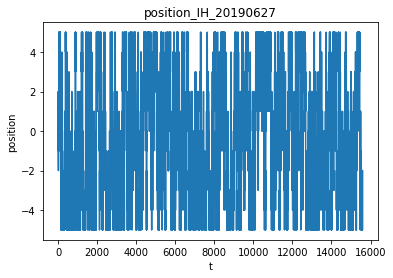

<Figure size 432x288 with 0 Axes>

In [124]:
plt.plot(pos)
#plt.plot(range(24000,26000),pos[24000:26000])
plt.xlabel('t')
plt.ylabel('position')
name="position_IH_"+str(date_test)
plt.title(name)
#plt.savefig(name+".png")
plt.figure()

In [20]:
len_test= len(return_test_class_real)

print(len(return_test_class_real))
print(len(return_test))
print(return_test[11])
print(return_test[-len_test+1])

28790
28800
0.003454947484793358
0.003454947484793358


<Figure size 432x288 with 0 Axes>

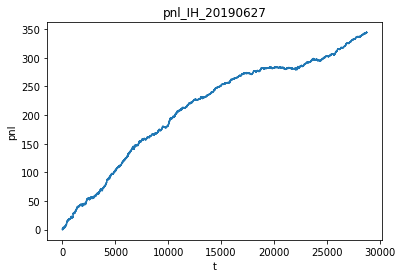

<Figure size 432x288 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt
plt.plot(portf_value)
plt.xlabel('t')
plt.ylabel('pnl')
name="pnl_IH_"+str(date_test)
plt.title(name)
#plt.savefig(name+".png")
plt.figure()

#cor = np.corrcoef([return_test_class_predicted_one,return_test_class_real])[0,1]
#return class_correct_rate, direction_correct_rate, cor, poscum